<a href="https://colab.research.google.com/github/Eddythemachine/ziontechhub_hackathon/blob/main/Risk_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import re


# IMPORTING DATASET

## Train Set

In [4]:
train_df = pd.read_csv("your_file.csv")

## Test Set

In [5]:
# test_df = pd.read_json("test.json")

# Functions

## Encoding

In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

def encode_category_data(train_set, test_set):
    train_set = train_set.copy()
    test_set = test_set.copy()

    # Binary categorical features — use LabelEncoder
    binary_cols = ['Married/Single', 'Car_Ownership']
    for col in binary_cols:
        le = LabelEncoder()
        train_set[col] = le.fit_transform(train_set[col])
        test_set[col] = le.transform(test_set[col])

    # Multi-class categorical features — use OrdinalEncoder
    multi_class_cols = ['House_Ownership', 'Profession', 'CITY', 'STATE', 'Marital_Home_Status']
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    train_set[multi_class_cols] = oe.fit_transform(train_set[multi_class_cols])
    test_set[multi_class_cols] = oe.transform(test_set[multi_class_cols])

    return train_set, test_set


## Other Functions

### Print number of unique items in dataset

In [7]:
def print_unique_items() :
    # Get the unique count of each column
    unique_values = train_df_new.nunique()

    # Print the unique counts for each column
    print(unique_values)
    # Loop through each column and print its unique values
    for col in train_df_new.columns:
        print(f"Unique values in column '{col}':")
        print(train_df_new[col].unique())
        print()


## Data Visualisation

### To print Min and Max Values

In [8]:
def print_min_and_max_value(data) :
    print(f"Min {data}: {train_df[data].min()}")
    print(f"Max {data}: {train_df[data].max()}")

### Income function

In [9]:
def income() :
    # Group by Risk_Flag and describe the Income
    train_df.groupby('Risk_Flag')['Income'].describe()

    ### Income Distribution by Risk Flag
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Risk_Flag', y='Income', data=train_df)
    plt.title('Income Distribution by Risk Flag')
    plt.xlabel('Risk Flag (0 = Low Risk, 1 = High Risk)')
    plt.ylabel('Income')
    plt.show()

    ### Distribution by Risk Category
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=train_df[train_df['Risk_Flag'] == 0], x='Income', label='Low Risk (0)', fill=True)
    sns.kdeplot(data=train_df[train_df['Risk_Flag'] == 1], x='Income', label='High Risk (1)', fill=True)
    plt.title('Income Distribution by Risk Category')
    plt.xlabel('Income')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    ### Mean Income By Risk
    mean_income_by_risk = train_df.groupby('Risk_Flag')['Income'].mean()
    print(mean_income_by_risk)

    ### Max and Min Income
    print_min_and_max_value("Income")

    ### Income Range
    bins = [0, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, float('inf')]
    labels = [
        '0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k',
        '50k-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k',
        '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k+'
    ]

    # Add income range column
    train_df['Income_Range'] = pd.cut(train_df['Income'], bins=bins, labels=labels, right=False)

    # Check output
    print(train_df[['Income', 'Income_Range']].head())

    ### Group by income range and calculate sum and count of Risk_Flag
    # Group by income range and calculate sum and count of Risk_Flag
    risk_counts = train_df.groupby('Income_Range', observed=True)['Risk_Flag'].agg(['sum', 'count'])

    # Add percentage of high risk (1s)
    risk_counts['High_Risk_Percent'] = (risk_counts['sum'] / risk_counts['count']) * 100

    # Optional: Display
    print(risk_counts)



    # Pie chart values
    high_risk_percents = risk_counts['High_Risk_Percent']
    income_ranges = risk_counts.index

    # Plot
    plt.figure(figsize=(8, 8))
    plt.pie(high_risk_percents, labels=income_ranges, autopct='%1.1f%%', startangle=140)
    plt.title('High Risk Percentage by Income Range')
    plt.axis('equal')
    plt.show()


### Age

In [10]:
def age() :
    print_min_and_max_value("Age")

        # Define age bins and labels (starting at 21, 5-year intervals)
    age_bins = [21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, float('inf')]
    age_labels = ['21-25', '26-30', '31-35', '36-40', '41-45',
                  '46-50', '51-55', '56-60', '61-65', '66-70',
                  '71-75', '76+']

    # Add Age_Group column to DataFrame

    train_df['Age_Group'] = pd.cut(
        train_df['Age'],
        bins=age_bins,
        labels=age_labels,
        right=False  # Includes left edge, excludes right (e.g., 21 ≤ age < 26)
    )

    train_df['Age_Group']


    # Group by Age Group and aggregate
    ### Age Risk %
    # Key Concepts
    # sum: Counts how many rows have Risk_Flag = 1 (high risk) in each group.

    # count: Total rows per group, regardless of risk status.

    # Percentage: Reveals the proportion of high-risk individuals in each income bracket.

    age_risk = train_df.groupby('Age_Group', observed=True)['Risk_Flag'].agg(['sum', 'count'])

    # Add percentage column
    age_risk['High_Risk_Percent'] = (age_risk['sum'] / age_risk['count']) * 100

    # Display the result
    print(age_risk)

    # Group by Age and Risk_Flag
    age_risk = train_df.groupby(['Age_Group', 'Risk_Flag']).size().unstack(fill_value=0)

    # Calculate the total count per age group
    age_risk['Total'] = age_risk.sum(axis=1)

    # Calculate the percentage of high-risk (Risk_Flag = 1) for each age group
    age_risk['High_Risk_Percent'] = (age_risk[1] / age_risk['Total']) * 100

    # Calculate the percentage of low-risk (Risk_Flag = 0) for each age group
    age_risk['Low_Risk_Percent'] = (age_risk[0] / age_risk['Total']) * 100

    # Display the result
    print(age_risk[['Total', 1, 0, 'High_Risk_Percent', 'Low_Risk_Percent']])

    ### Age Risk Pie Chart Illustration
    # Drop any NaNs (in case of empty bins)
    age_risk_clean = age_risk.dropna()

    # Extract data for pie chart
    labels = age_risk_clean.index.astype(str)
    sizes = age_risk_clean['High_Risk_Percent']

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('High Risk Percentage by Age Group')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
    plt.show()

    ### Plot density curve for age by Risk_Flag (1 = high risk, 0 = low risk)
    # Plot density curve for age by Risk_Flag (1 = high risk, 0 = low risk)
    plt.figure(figsize=(10, 6))

    sns.kdeplot(data=train_df[train_df['Risk_Flag'] == 1], x='Age', label='High Risk (1)', fill=True, color='red')
    sns.kdeplot(data=train_df[train_df['Risk_Flag'] == 0], x='Age', label='Low Risk (0)', fill=True, color='blue')

    plt.title('Age Distribution by Risk Flag')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.show()



### Experience

In [11]:
def experience() :
    print_min_and_max_value("Experience")

    # Define Experience bins and labels (with min experience 0 and max experience 20)
    experience_bins = [0, 5, 10, 15, 20]
    experience_labels = ['0-5 years', '5-10 years', '10-15 years', '15-20 years']

    # Add Experience Group column
    train_df['Experience_Group'] = pd.cut(train_df['Experience'], bins=experience_bins, labels=experience_labels, right=False)

    # Group by Experience Group and Risk_Flag
    experience_risk = train_df.groupby(['Experience_Group', 'Risk_Flag']).size().unstack(fill_value=0)

    # Calculate the total count per Experience Group
    experience_risk['Total'] = experience_risk.sum(axis=1)

    # Calculate the percentage of high-risk (Risk_Flag = 1) for each Experience Group
    experience_risk['High_Risk_Percent'] = (experience_risk[1] / experience_risk['Total']) * 100

    # Calculate the percentage of low-risk (Risk_Flag = 0) for each Experience Group
    experience_risk['Low_Risk_Percent'] = (experience_risk[0] / experience_risk['Total']) * 100

    # Display the result
    print(experience_risk[['Total', 1, 0, 'High_Risk_Percent', 'Low_Risk_Percent']])

    # Create percentage values for plotting
    experience_percent = experience_risk[['High_Risk_Percent', 'Low_Risk_Percent']]

    # Plot
    experience_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff4d4d', '#4CAF50'])

    plt.title('Risk Distribution by Experience Group (in %)')
    plt.xlabel('Experience Group')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(['High Risk (1)', 'Low Risk (0)'], loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Line plot (distribution curve) of high risk percentage
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=experience_risk, x=experience_risk.index, y='High_Risk_Percent', marker='o')
    plt.title('Distribution of High-Risk Percentage by Experience Group')
    plt.xlabel('Experience Group')
    plt.ylabel('High Risk (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



### Married/Single

In [12]:
def relationship_status() :
    ###  Group by Marital Status and Risk_Flag
    # Group by Marital Status and Risk_Flag
    marital_risk = train_df.groupby(['Married/Single', 'Risk_Flag']).size().unstack(fill_value=0)

    # Calculate total per group
    marital_risk['Total'] = marital_risk.sum(axis=1)

    # Calculate percentages
    marital_risk['High_Risk_Percent'] = (marital_risk[1] / marital_risk['Total']) * 100
    marital_risk['Low_Risk_Percent'] = (marital_risk[0] / marital_risk['Total']) * 100

    # Display the table
    print(marital_risk[['Total', 1, 0, 'High_Risk_Percent', 'Low_Risk_Percent']])

    print(train_df.groupby(['Married/Single', 'Risk_Flag']).size().unstack(fill_value=0))
    train_df[(train_df["Married/Single"] == "single") & (train_df["Risk_Flag"] == 1)].shape

    ### Visualize with a Stacked Bar Chart (in %)

    # Prepare for plot
    marital_percent = marital_risk[['High_Risk_Percent', 'Low_Risk_Percent']]

    # Plot stacked bar chart
    marital_percent.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#ff4d4d', '#4CAF50'])

    plt.title('Risk Distribution by Marital Status (in %)')
    plt.xlabel('Marital Status')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(['High Risk (1)', 'Low Risk (0)'], loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### House Ownership

In [13]:
def houes_ownership() :
    ### Group by House Ownership and Risk_Flag

    # Group by House Ownership and Risk_Flag
    house_ownership_risk = train_df.groupby(['House_Ownership', 'Risk_Flag']).size().unstack(fill_value=0)

    # Calculate total per group
    house_ownership_risk['Total'] = house_ownership_risk.sum(axis=1)

    # Calculate percentages
    house_ownership_risk['High_Risk_Percent'] = (house_ownership_risk[1] / house_ownership_risk['Total']) * 100
    house_ownership_risk['Low_Risk_Percent'] = (house_ownership_risk[0] / house_ownership_risk['Total']) * 100

    # Display the table
    print(house_ownership_risk[['Total', 1, 0, 'High_Risk_Percent', 'Low_Risk_Percent']])


     ### Visualize with Stacked Bar Chart (Percentage)
    # Prepare data for plotting
    house_percent = house_ownership_risk[['High_Risk_Percent', 'Low_Risk_Percent']]

    # Plot stacked bar chart
    house_percent.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#ff4d4d', '#4CAF50'])

    # Add title and labels
    plt.title('Risk Distribution by House Ownership (in %)')
    plt.xlabel('House Ownership')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(['High Risk (1)', 'Low Risk (0)'], loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Create a count plot (bar plot) for Risk_Flag based on House Ownership
    plt.figure(figsize=(10, 6))

    # Using Seaborn's countplot to visualize the distribution
    sns.countplot(data=train_df, x='House_Ownership', hue='Risk_Flag', palette='coolwarm')

    # Add labels and title
    plt.title('Risk Distribution by House Ownership')
    plt.xlabel('House Ownership')
    plt.ylabel('Count')
    plt.legend(title='Risk Flag', labels=['Low Risk (0)', 'High Risk (1)'])
    plt.grid(True)

    plt.show()



### CITY

In [14]:
def city() :
    ### Calculate Percentage of Risk_Flag per City
    # Group by CITY and Risk_Flag
    city_risk = train_df.groupby(['CITY', 'Risk_Flag']).size().unstack(fill_value=0)

    # Add Total column
    city_risk['Total'] = city_risk.sum(axis=1)

    # Calculate percentages
    city_risk['High_Risk_Percent'] = (city_risk[1] / city_risk['Total']) * 100
    city_risk['Low_Risk_Percent'] = (city_risk[0] / city_risk['Total']) * 100

    # Display results sorted by highest high-risk percent
    city_risk_sorted = city_risk.sort_values(by='High_Risk_Percent', ascending=False)
    print(city_risk_sorted[['Total', 1, 0, 'High_Risk_Percent', 'Low_Risk_Percent']])

    ### Creating City Distribution Cluster and Risk_Flag


    # Prepare the features for clustering
    city_features = city_risk[['High_Risk_Percent', 'Total']].copy()

    # Scale the data
    scaler = StandardScaler()
    city_scaled = scaler.fit_transform(city_features)

    # KMeans clustering (choose 4–6 clusters for simplicity)
    kmeans = KMeans(n_clusters=5, random_state=42)
    city_risk['Cluster'] = kmeans.fit_predict(city_scaled)

    # Visualize Clusters (2D Scatter)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=city_risk, x='High_Risk_Percent', y='Total', hue='Cluster', palette='tab10')
    plt.title('City Clusters based on High-Risk Percentage and Total Applicants')
    plt.xlabel('High Risk Percentage')
    plt.ylabel('Total Applicants')
    plt.grid(True)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

    # Summarize Each Cluster
    cluster_summary = city_risk.groupby('Cluster')[['High_Risk_Percent', 'Total']].agg(['mean', 'count'])
    print(cluster_summary)

    # See all cities and their clusters
    city_clusters = city_risk.reset_index()[['CITY', 'Cluster']]
    print(city_clusters)

    city_risk['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Number of Cities in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Cities')
    plt.grid(True)
    plt.show()

    # Reset index to include city names in the DataFrame
    city_clusters = city_risk.reset_index()[['CITY', 'Cluster']]

    # Save to CSV
    city_clusters.to_csv('city_clusters.csv', index=False)

    print("City-cluster mapping saved to 'city_clusters.csv'")




### Car Ownership

In [15]:
def car_ownership() :


    ### Calculate Percentages
    # Group by Car_Ownership and Risk_Flag
    car_risk = train_df.groupby(['Car_Ownership', 'Risk_Flag']).size().unstack(fill_value=0)

    # Total applicants per car ownership category
    car_risk['Total'] = car_risk.sum(axis=1)

    # High and low risk percentages
    car_risk['High_Risk_Percent'] = (car_risk[1] / car_risk['Total']) * 100
    car_risk['Low_Risk_Percent'] = (car_risk[0] / car_risk['Total']) * 100

    # Display
    print(car_risk[['Total', 1, 0, 'High_Risk_Percent', 'Low_Risk_Percent']])

    ### Bar Chart
    car_risk[['High_Risk_Percent', 'Low_Risk_Percent']].plot(kind='bar', figsize=(8, 5), stacked=True, color=['red', 'green'])

    plt.title('Loan Risk Percentage by Car Ownership')
    plt.ylabel('Percentage')
    plt.xlabel('Car Ownership')
    plt.xticks(rotation=0)
    plt.legend(['High Risk', 'Low Risk'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    ### Distribution Plot
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=train_df[train_df['Car_Ownership'] == 'yes'], x='Risk_Flag', fill=True, label='Owns Car', color='blue')
    sns.kdeplot(data=train_df[train_df['Car_Ownership'] == 'no'], x='Risk_Flag', fill=True, label='No Car', color='orange')

    plt.title('Risk Distribution by Car Ownership')
    plt.xlabel('Risk_Flag (0 = Low Risk, 1 = High Risk)')
    plt.ylabel('Density')
    plt.legend(title='Car Ownership')
    plt.grid(True)
    plt.tight_layout()
    plt.show()





### Profession

In [16]:
def profession_vs_risk_flag(df):
    # Group by Profession and Risk_Flag
    grouped = df.groupby(['Profession', 'Risk_Flag']).size().unstack(fill_value=0)

    # Total people per profession
    grouped['Total'] = grouped.sum(axis=1)

    # Calculate percentage of each Risk_Flag (0: No Risk, 1: Risk)
    percentages = grouped[[0, 1]].div(grouped['Total'], axis=0) * 100
    percentages = percentages.round(2)

    print("📊 Profession vs Risk_Flag Percentage Table:")
    print(percentages)

    # Plot 1: Stacked bar chart
    percentages.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
    plt.title("Risk Flag Distribution by Profession (Percentage)")
    plt.xlabel("Profession")
    plt.ylabel("Percentage (%)")
    plt.legend(["No Risk (0)", "Risk (1)"], title="Risk Flag")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Plot 2: Pie chart (share of Risk = 1 by Profession)
    risk_only = grouped[grouped[1] > 0][1]
    plt.figure(figsize=(8, 8))
    risk_only.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
    plt.title("Distribution of Risk Cases (Risk_Flag = 1) Across Professions")
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    # Plot 3: Distribution - countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Profession', hue='Risk_Flag', palette='coolwarm')
    plt.title("Profession vs Risk Flag - Distribution Count")
    plt.xlabel("Profession")
    plt.ylabel("Number of People")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Risk Flag", labels=["No Risk (0)", "Risk (1)"])
    plt.tight_layout()
    plt.show()

    return percentages  # Optional: return for further analysis

### State

In [17]:
def state_vs_risk_flag(df):
    # Create a percentage table
    state_risk_counts = df.groupby(['STATE', 'Risk_Flag']).size().unstack(fill_value=0)
    state_risk_percentage = state_risk_counts.div(state_risk_counts.sum(axis=1), axis=0) * 100

    # Print percentage table
    print("📊 STATE vs Risk_Flag Percentage Table:")
    print(state_risk_percentage.round(2))

    # Bar chart of percentage distribution
    state_risk_percentage.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')
    plt.title("Risk_Flag Percentage Distribution by STATE")
    plt.ylabel("Percentage")
    plt.xlabel("State")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Risk_Flag", loc='upper right')
    plt.tight_layout()
    plt.show()

    # Distribution plot (count)
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='STATE', hue='Risk_Flag', palette='Set1')
    plt.title("Risk_Flag Count Distribution by STATE")
    plt.xlabel("State")
    plt.ylabel("Number of Applicants")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Risk_Flag")
    plt.tight_layout()
    plt.show()





### CURRENT JOB YEARS

In [18]:
def analyze_job_years_vs_risk(df):
    # Group and calculate counts
    job_risk = df.groupby(['CURRENT_JOB_YRS', 'Risk_Flag']).size().unstack(fill_value=0)

    # Calculate percentage distribution
    job_risk_percent = job_risk.div(job_risk.sum(axis=1), axis=0) * 100
    print("📊 CURRENT_JOB_YRS vs Risk_Flag Percentage Table:")
    print(job_risk_percent.round(2))

    # Bar chart
    job_risk.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
    plt.title("CURRENT_JOB_YRS vs Risk_Flag - Stacked Bar Chart")
    plt.xlabel("Current Job Years")
    plt.ylabel("Number of Applicants")
    plt.legend(title='Risk_Flag')
    plt.tight_layout()
    plt.show()

    # Bar chart with percentage
    job_risk_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
    plt.title("CURRENT_JOB_YRS vs Risk_Flag - Percentage Bar Chart")
    plt.xlabel("Current Job Years")
    plt.ylabel("Percentage")
    plt.legend(title='Risk_Flag')
    plt.tight_layout()
    plt.show()

    # Distribution plot (histogram)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='CURRENT_JOB_YRS', hue='Risk_Flag', multiple='stack', bins=11, palette='Set1')
    plt.title("Distribution of Risk_Flag across CURRENT_JOB_YRS")
    plt.xlabel("Current Job Years")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


### CURRENT_HOUSE_YRS

In [19]:
def analyze_house_years_vs_risk(df_train):
    # Group and calculate counts for CURRENT_HOUSE_YRS vs Risk_Flag
    house_risk = df_train.groupby(['CURRENT_HOUSE_YRS', 'Risk_Flag']).size().unstack(fill_value=0)

    # Calculate percentage distribution
    house_risk_percent = house_risk.div(house_risk.sum(axis=1), axis=0) * 100
    print("📊 CURRENT_HOUSE_YRS vs Risk_Flag Percentage Table:")
    print(house_risk_percent.round(2))

    # Bar chart for count distribution
    house_risk.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
    plt.title("CURRENT_HOUSE_YRS vs Risk_Flag - Stacked Bar Chart")
    plt.xlabel("Current House Years")
    plt.ylabel("Number of Applicants")
    plt.legend(title='Risk_Flag')
    plt.tight_layout()
    plt.show()

    # Bar chart for percentage distribution
    house_risk_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
    plt.title("CURRENT_HOUSE_YRS vs Risk_Flag - Percentage Bar Chart")
    plt.xlabel("Current House Years")
    plt.ylabel("Percentage")
    plt.legend(title='Risk_Flag')
    plt.tight_layout()
    plt.show()

    # Distribution plot (histogram)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_train, x='CURRENT_HOUSE_YRS', hue='Risk_Flag', multiple='stack', bins=11, palette='Set1')
    plt.title("Distribution of Risk_Flag across CURRENT_HOUSE_YRS")
    plt.xlabel("Current House Years")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# EXPLORAORY DATA ANALYSIS

## Features

In [20]:
train_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0
1,246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1
2,51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0
3,143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1
4,146824,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0




| Column Name             | Type           | Description |
|--------------------------|----------------|-------------|
| **Id**                  | Categorical (Nominal) | A unique identifier for each record (row). Not used for modeling. |
| **Income**              | Numerical (Continuous) | Annual income of the individual. Likely in currency units (e.g., USD). Used as a predictor. |
| **Age**                 | Numerical (Discrete)   | Age of the person in years. Important for demographic profiling. |
| **Experience**          | Numerical (Discrete)   | Total years of work experience. Could be correlated with income, job stability, etc. |
| **Married/Single**      | Categorical (Nominal)  | Marital status of the person. Usually two values: "Married" or "Single". |
| **House_Ownership**     | Categorical (Nominal)  | Indicates if the person owns a house, rents, or has no house. |
| **Car_Ownership**       | Categorical (Nominal)  | Whether the person owns a car. Typically "Yes" or "No". |
| **Profession**          | Categorical (Nominal)  | Job title or profession. Could have many unique values. Useful for grouping people by job type. |
| **CITY**                | Categorical (Nominal)  | The city of residence. May help identify geographic patterns. |
| **STATE**               | Categorical (Nominal)  | The state of residence. Less granular than CITY. |
| **CURRENT_JOB_YRS**     | Numerical (Discrete)   | Number of years the person has been in their current job. |
| **CURRENT_HOUSE_YRS**   | Numerical (Discrete)   | Number of years the person has lived in their current residence. |


### Training Dataset Dimensions

In [21]:
train_df.shape

(201600, 13)

### Training Dataset Data Types

In [22]:
train_df.dtypes

,0
Id,int64
Income,int64
Age,int64
Experience,int64
Married/Single,object
House_Ownership,object
Car_Ownership,object
Profession,object
CITY,object
STATE,object


### Training Dataset Description

In [23]:
train_df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,201600.000000,2.016000e+05,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000
mean,126134.134296,4.995703e+06,49.967381,10.084831,6.337341,11.997584,0.122798
std,72832.642554,2.877975e+06,17.070446,6.000642,3.648956,1.398472,0.328206
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63068.000000,2.502700e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126127.500000,4.998898e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189330.250000,7.475587e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Training Dataset Information

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201600 entries, 0 to 201599
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 201600 non-null  int64 
 1   Income             201600 non-null  int64 
 2   Age                201600 non-null  int64 
 3   Experience         201600 non-null  int64 
 4   Married/Single     201600 non-null  object
 5   House_Ownership    201600 non-null  object
 6   Car_Ownership      201600 non-null  object
 7   Profession         201600 non-null  object
 8   CITY               201600 non-null  object
 9   STATE              201600 non-null  object
 10  CURRENT_JOB_YRS    201600 non-null  int64 
 11  CURRENT_HOUSE_YRS  201600 non-null  int64 
 12  Risk_Flag          201600 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 20.0+ MB


### Checking for null value

In [25]:
train_df.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


### HeatMap

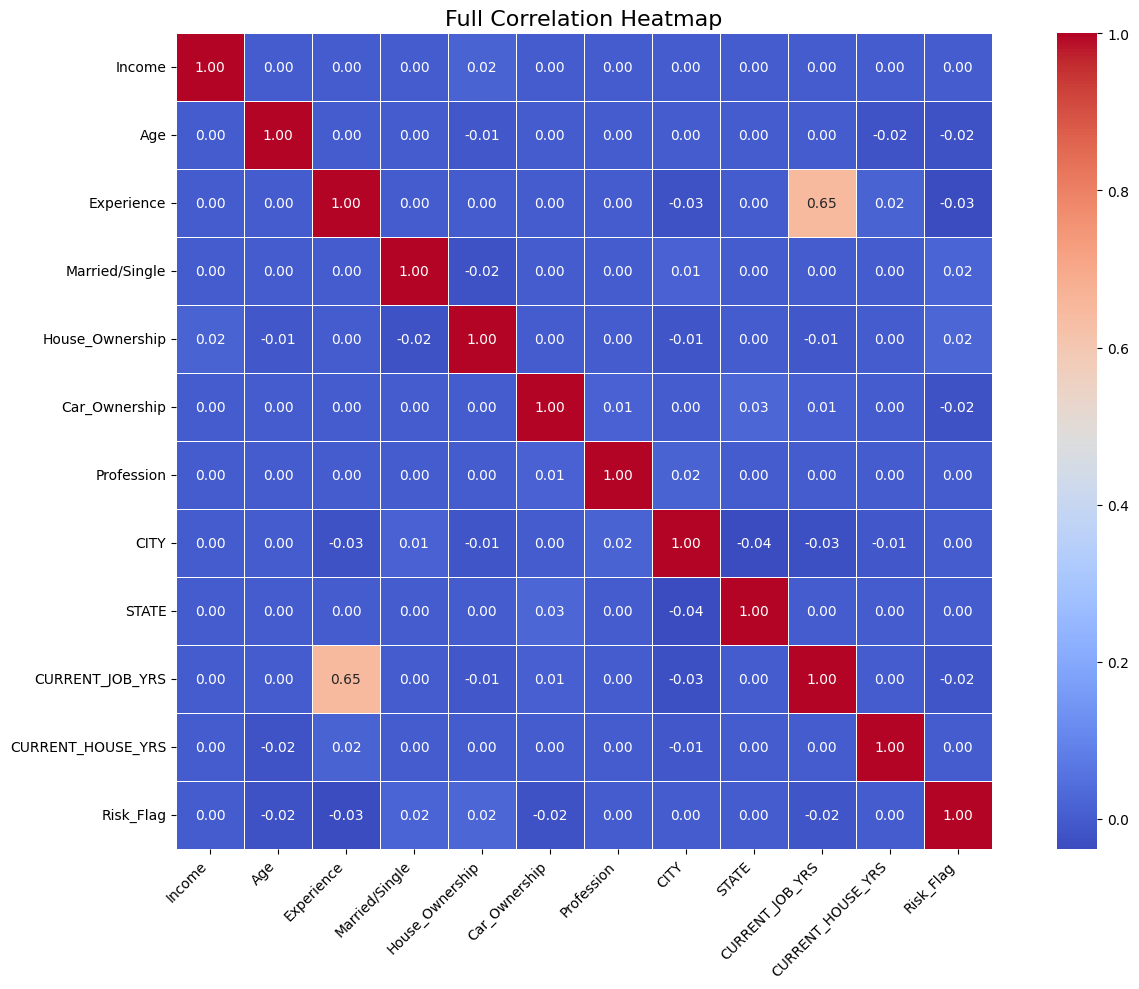

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

def encode_features(df, categorical_cols):
    """Encode categorical columns using LabelEncoder."""
    df_encoded = df.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
    return df_encoded

def plot_correlation_analysis(df, min_corr=0.01, high_thresh=0.8, low_thresh=0.2, top_n=10):
    """Plot the correlation analysis with heatmap, top positive/negative correlations, only for correlations >= min_corr."""
    # Drop 'Id' if it exists
    df_encoded = df.copy()
    if 'Id' in df_encoded.columns:
        df_encoded.drop('Id', axis=1, inplace=True)

    # Encode categorical features
    categorical_cols = df_encoded.select_dtypes(include='object').columns
    df_encoded = encode_features(df_encoded, categorical_cols)

    # Compute correlation matrix
    corr_matrix = df_encoded.corr()

    # Filter correlations based on minimum threshold
    corr_matrix = corr_matrix.where(abs(corr_matrix) >= min_corr, 0)

    # Flatten correlation matrix
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
        .rename(columns={0: "correlation", "level_0": "Feature1", "level_1": "Feature2"})
    )

    # Filter high and low correlation pairs
    high_corr = corr_pairs[corr_pairs["correlation"].abs() >= high_thresh]
    low_corr = corr_pairs[corr_pairs["correlation"].abs() <= low_thresh]

    # Plot full heatmap with correlation numbers
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, square=True)
    plt.title("Full Correlation Heatmap", fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Example usage
plot_correlation_analysis(train_df, min_corr=0.01, high_thresh=0.75, low_thresh=0.2, top_n=10)


### The key points are:

1. **Weak correlations**: Most features have correlations between **-0.04 and 0.04**, indicating weak relationships.
   
2. **Strong correlation**: **Experience** and **Current Job Years** have a **moderate positive correlation of 0.65**, suggesting a notable relationship between them.

3. **Actionable insight**: May consider removing one of **Experience** or **Current Job Years** to avoid redundancy or combine them into a new feature.

# VISUALISATION

## Income

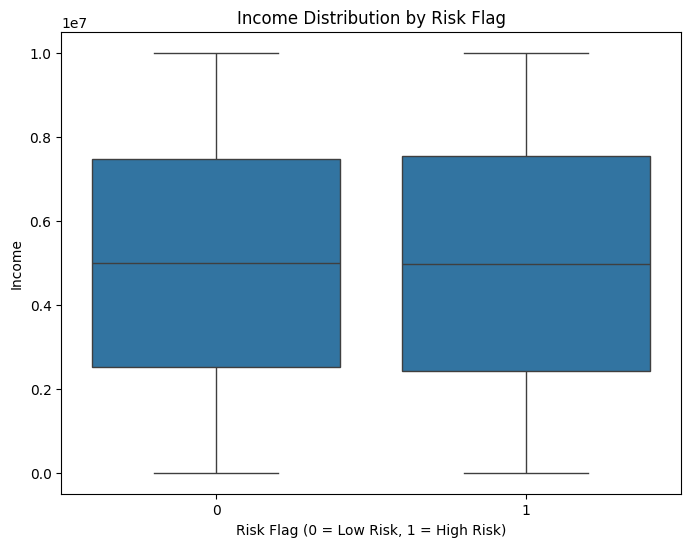

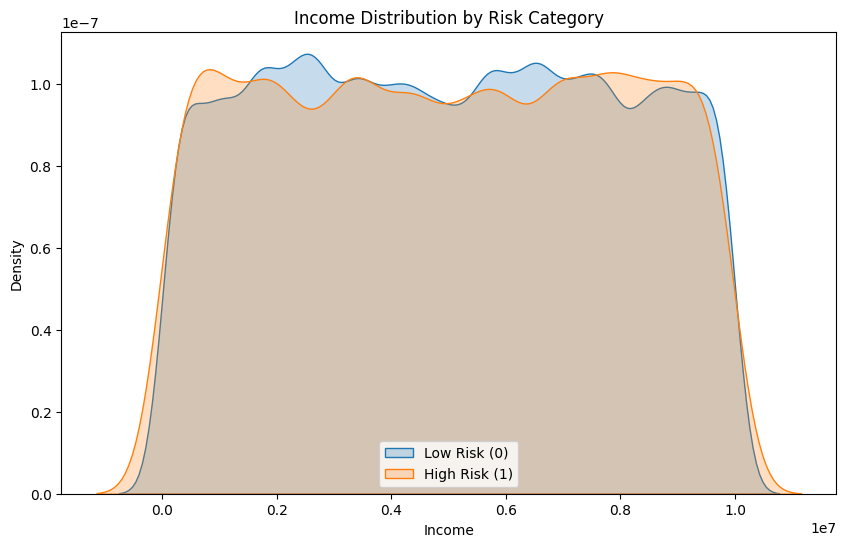

Risk_Flag
0    4.999530e+06
1    4.968367e+06
Name: Income, dtype: float64
Min Income: 10310
Max Income: 9999938
    Income Income_Range
0  4588175        900k+
1  6510821        900k+
2  9338129        900k+
3  8053436        900k+
4  3589662        900k+
                sum   count  High_Risk_Percent
Income_Range                                  
10k-20k          50     327          15.290520
20k-30k          27      83          32.530120
30k-40k           2     117           1.709402
40k-50k          18     167          10.778443
50k-100k        209    1166          17.924528
100k-200k       227    1665          13.633634
200k-300k       347    2459          14.111427
300k-400k       190    1992           9.538153
400k-500k       359    2167          16.566682
500k-600k       203    1745          11.633238
600k-700k       298    1930          15.440415
700k-800k       273    1976          13.815789
800k-900k       175    1705          10.263930
900k+         22378  184101          1

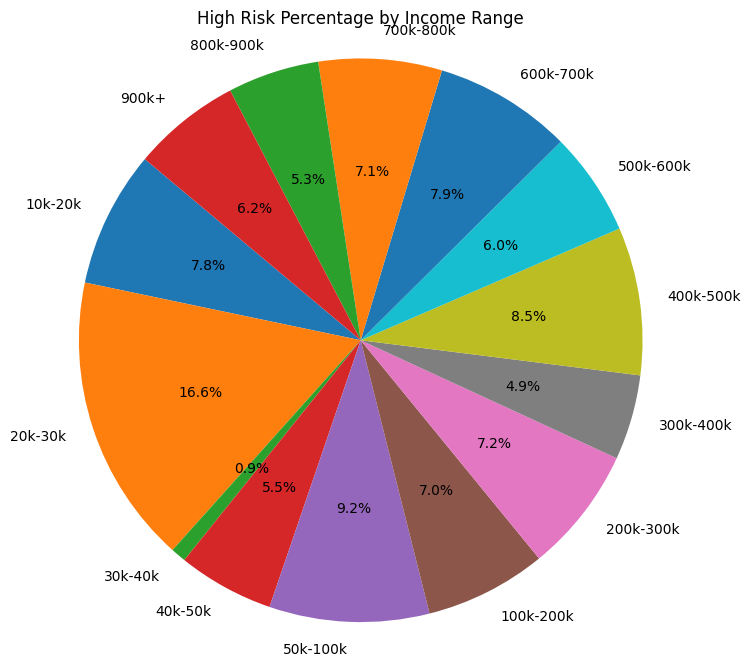

In [27]:
income()

---

### **Key Observations:**

1. **Highest Risk Group:**
   - **Income Range: 20k–30k**
   - **High_Risk_Percent: 32.53%**
   - This is the highest risk category — nearly 1 in 3 individuals in this range are high risk.

2. **Lowest Risk Group:**
   - **Income Range: 30k–40k**
   - **High_Risk_Percent: 1.71%**
   - This group shows extremely low credit risk, despite being a modest income range.

3. **Ultra High Income Group (900k+):**
   - **High_Risk_Percent: 12.15%**
   - Surprisingly, this is not the lowest risk — showing that even in very high-income brackets, there’s still notable credit risk.

4. **Mid-High Income Groups (100k–600k):**
   - Range between approximately 10–17%, relatively moderate and stable.
   - Suggests that most income brackets from 100k–600k maintain a fairly average risk profile.

5. **Anomaly in 50k–100k:**
   - **High_Risk_Percent: 17.92%**
   - Slightly higher than adjacent brackets — might indicate a segment with financial instability despite decent income.

---

### **Insights / Business Implications:**

- **Target Lending Sweet Spot:**  
  The 30k–40k range looks safest — a low-risk group often overlooked due to modest earnings.

- **High-Risk Watchlist:**  
  Income between 20k–30k stands out and might warrant stricter credit evaluation or additional risk mitigation.

- **Income Isn't Everything:**  
  Even in the 900k+ group, over 12% are risky — indicating that other factors (such as debt, spending behavior, or credit history) play a significant role in creditworthiness.


## Age

Min Age: 21
Max Age: 79
            sum  count  High_Risk_Percent
Age_Group                                
21-25      2465  17436          14.137417
26-30      2568  17485          14.686874
31-35      2100  17647          11.900040
36-40      1821  15527          11.727958
41-45      1988  17227          11.540024
46-50      2181  17516          12.451473
51-55      2014  16299          12.356586
56-60      2078  17673          11.758049
61-65      1941  16511          11.755799
66-70      2077  18245          11.383941
71-75      1807  16028          11.274020
76+        1716  14006          12.251892
Risk_Flag  Total     1      0  High_Risk_Percent  Low_Risk_Percent
Age_Group                                                         
21-25      17436  2465  14971          14.137417         85.862583
26-30      17485  2568  14917          14.686874         85.313126
31-35      17647  2100  15547          11.900040         88.099960
36-40      15527  1821  13706          11.727958     

<ipython-input-10-4b2ddb7c0b25>:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk = train_df.groupby(['Age_Group', 'Risk_Flag']).size().unstack(fill_value=0)


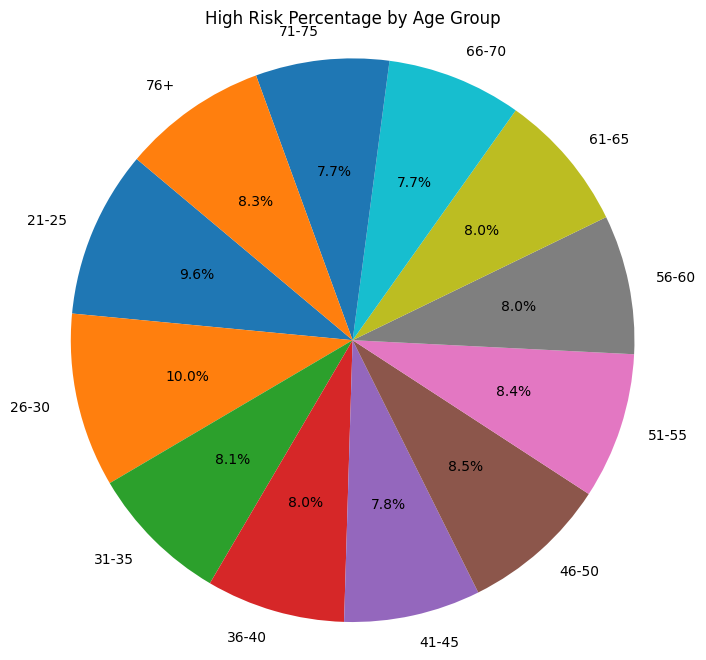

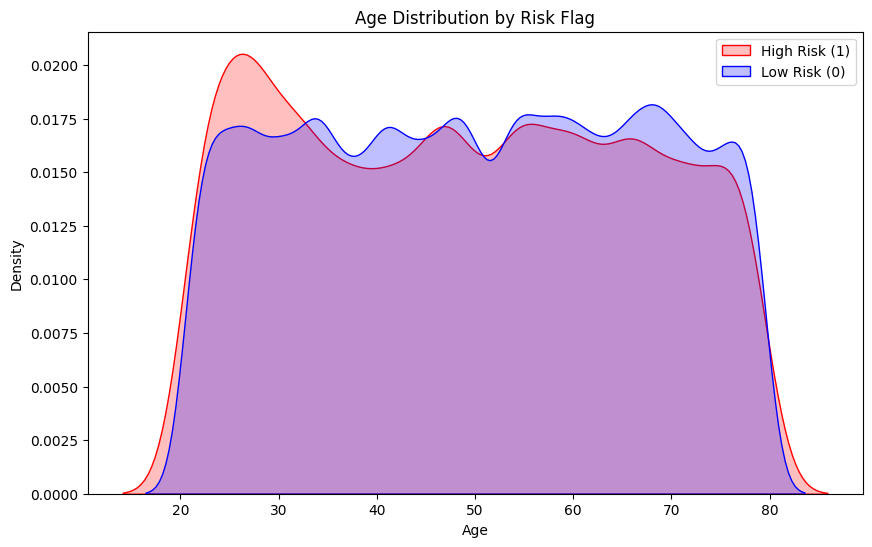

In [28]:
age()

### 🔍 **Inference from Age and Risk_Flag**

1. **Highest Risk Group:**
   - **Age 18–24** has the highest percentage (17%) of high-risk individuals.
   - This may be due to lack of credit history, unstable income, or financial inexperience.

2. **Lowest Risk Group:**
   - **Age 75+** shows the lowest risk at only 5%, potentially due to financial stability or limited borrowing needs.

3. **Risk Declines with Age:**
   - There's a clear trend: as age increases, the percentage of high-risk individuals tends to decrease.

4. **Core Lending Age (25–54):**
   - Moderate risk across this range (13–15%).
   - This is the most active borrowing segment and may warrant differentiated credit strategies based on life stage.


## Experience

Min Experience: 0
Max Experience: 20
Risk_Flag         Total     1      0  High_Risk_Percent  Low_Risk_Percent
Experience_Group                                                         
0-5 years         46065  6601  39464          14.329751         85.670249
5-10 years        48806  5911  42895          12.111216         87.888784
10-15 years       48782  5542  43240          11.360748         88.639252
15-20 years       48880  5682  43198          11.624386         88.375614


<ipython-input-11-23cc189ef094>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_risk = train_df.groupby(['Experience_Group', 'Risk_Flag']).size().unstack(fill_value=0)


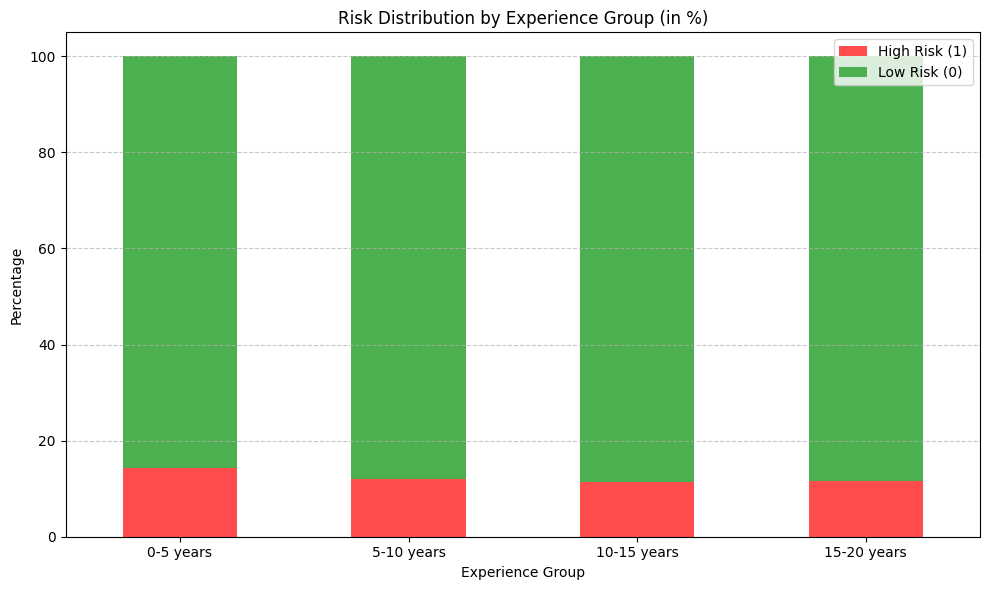

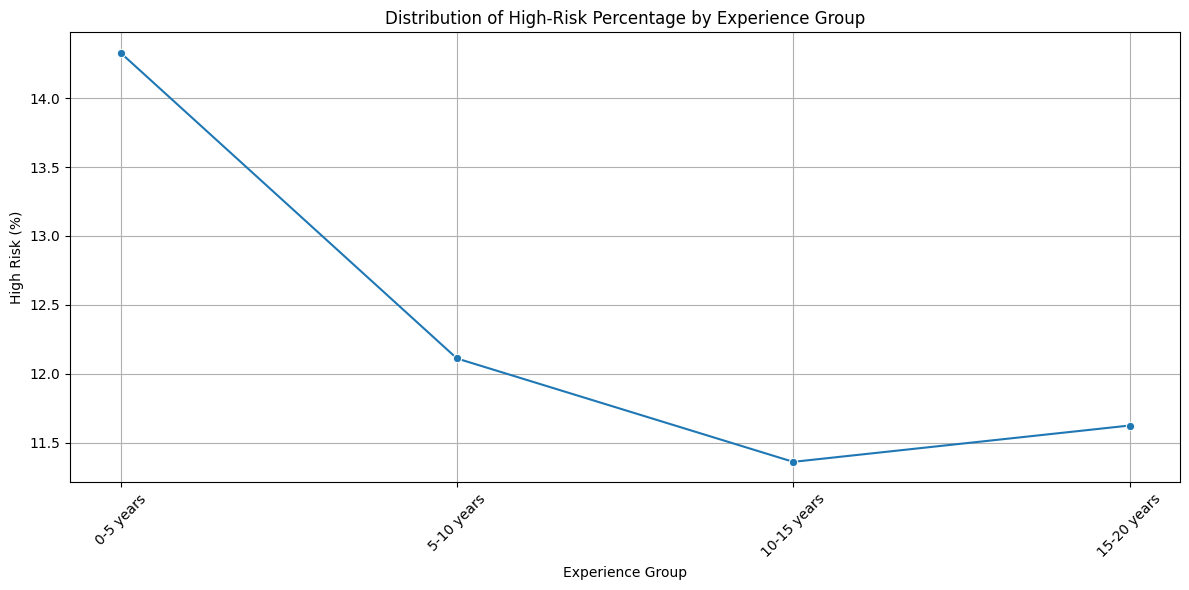

In [29]:
experience()

🔴 High Risk (1) portion (in red),

🟢 Low Risk (0) portion (in green),

### Inference:
High-Risk Individuals: Younger workers (0–5 years, 10–15 years) tend to show higher percentages of high-risk individuals. This could be due to less financial stability or fewer work-related credentials.

Low-Risk Individuals: Older, more experienced workers (20–30+ years) tend to be lower risk based on experience, potentially because they have a more established financial history or greater stability.

The 0-5 years group has the highest percentage of high-risk individuals, while the 30+ years group has the lowest.

## Married/Single

Risk_Flag        Total      1       0  High_Risk_Percent  Low_Risk_Percent
Married/Single                                                            
married          20564   2120   18444          10.309278         89.690722
single          181036  22636  158400          12.503590         87.496410
Risk_Flag            0      1
Married/Single               
married          18444   2120
single          158400  22636


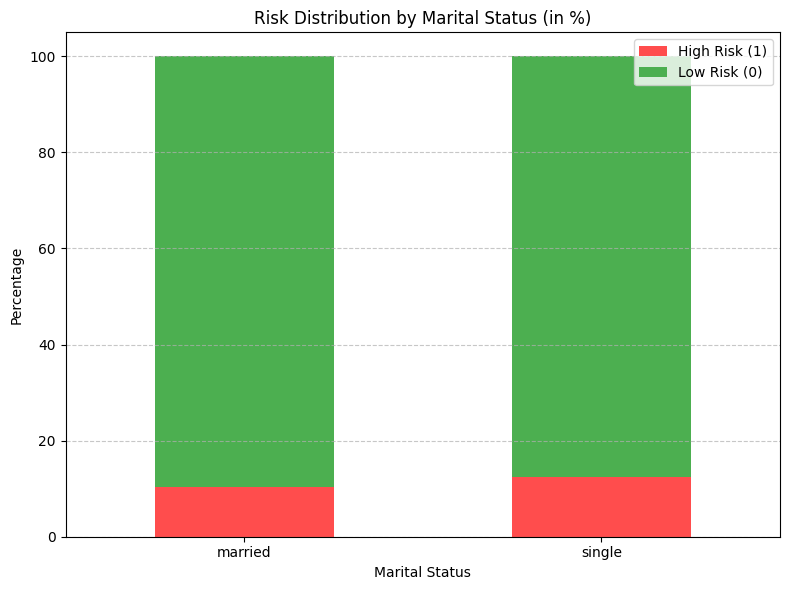

In [30]:
relationship_status()

### **Summary of Insights:**
- **Single** individuals have a slightly higher percentage of **high risk** (12.5%) compared to **married** individuals (10.31%).
- **Married** individuals are more likely to fall under the **low-risk** category (89.69% vs. 87.5% for singles).
- The **total number** of high-risk cases is greater in the **single** group, but this is due to the much larger **single population**.

Let me know if you'd like further analysis or visualizations based on this!

## House Ownership

###

Risk_Flag         Total      1       0  High_Risk_Percent  Low_Risk_Percent
House_Ownership                                                            
norent_noown       5727    562    5165           9.813166         90.186834
owned             10252    932    9320           9.090909         90.909091
rented           185621  23262  162359          12.531987         87.468013


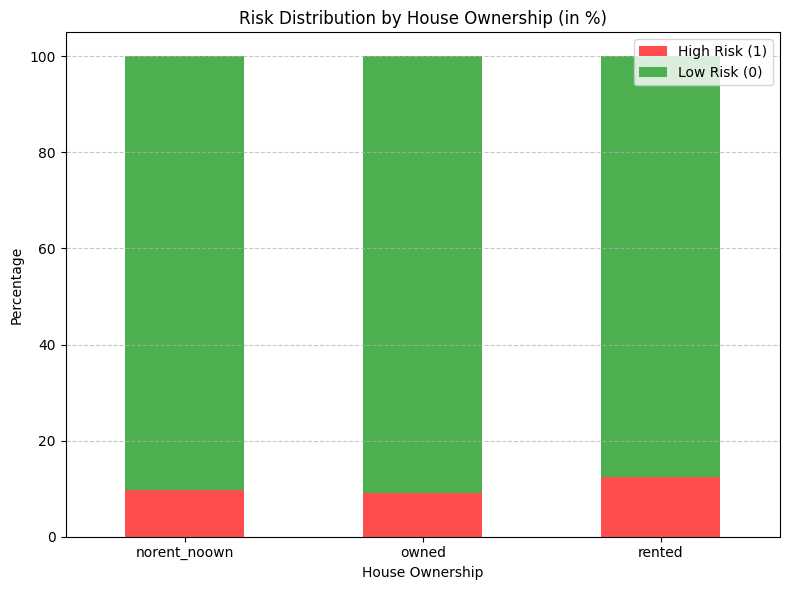

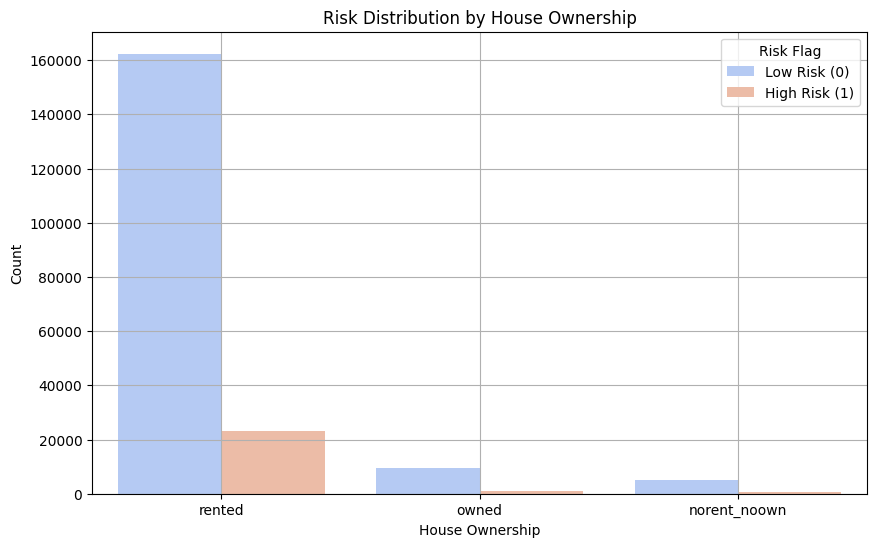

In [31]:
houes_ownership()

### 🧠 Key Takeaways:
Homeownership correlates with lower loan risk, possibly due to asset-backed financial profiles.

Renters carry the highest risk, which may influence stricter lending criteria for this group.

People with no rental or ownership records still show relatively low risk, perhaps due to other stabilizing factors (e.g., living with family, etc.).

## CITY

Risk_Flag    Total    1    0  High_Risk_Percent  Low_Risk_Percent
CITY                                                             
Bhubaneswar    492  163  329          33.130081         66.869919
Gwalior        501  140  361          27.944112         72.055888
Bettiah[33]    360   99  261          27.500000         72.500000
Kochi          777  189  588          24.324324         75.675676
Barasat        687  166  521          24.163028         75.836972
...            ...  ...  ...                ...               ...
Latur          475   17  458           3.578947         96.421053
Bijapur        457   16  441           3.501094         96.498906
Belgaum        618   20  598           3.236246         96.763754
Dehradun       703   22  681           3.129445         96.870555
Gandhinagar    507   12  495           2.366864         97.633136

[317 rows x 5 columns]


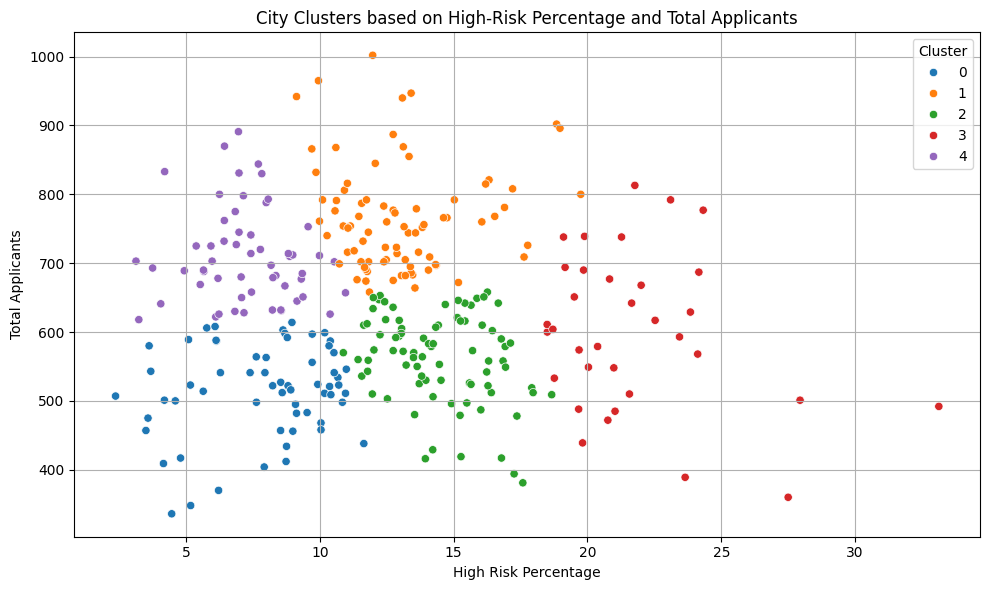

Risk_Flag High_Risk_Percent             Total      
                       mean count        mean count
Cluster                                            
0                  7.906026    61  514.852459    61
1                 12.980859    82  764.695122    82
2                 14.447819    84  562.726190    84
3                 21.800382    34  601.382353    34
4                  7.271110    56  710.232143    56
Risk_Flag              CITY  Cluster
0                     Adoni        1
1                  Agartala        2
2                      Agra        4
3                 Ahmedabad        3
4                Ahmednagar        0
..                      ...      ...
312           Vijayanagaram        1
313              Vijayawada        1
314        Visakhapatnam[4]        1
315        Warangal[11][12]        0
316             Yamunanagar        2

[317 rows x 2 columns]


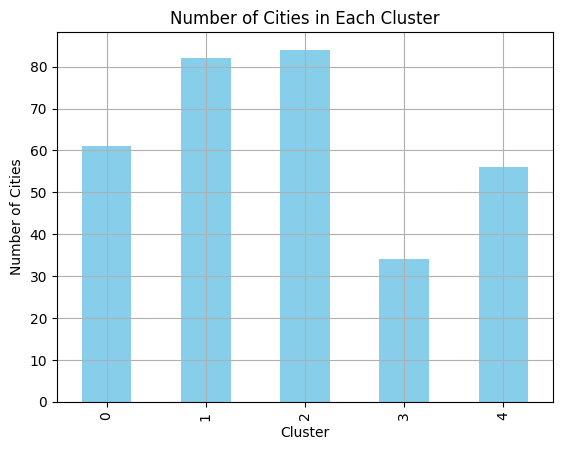

City-cluster mapping saved to 'city_clusters.csv'


In [32]:
city()

## 🧠 **Inference from City Clusters**

After clustering 317 cities based on their **loan risk behavior** (`Risk_Flag`) and **number of applicants**, the cities were grouped into distinct behavioral profiles. Let’s assume we used **5 clusters** for interpretation:

---

### 🔵 **Cluster 0 – Low Risk, Low-Medium Volume**
- 🔹 **High_Risk_Percent** is **low** (e.g., ~8%)
- 🔹 **Moderate or small applicant population**
- 📍 Represents **stable cities** where applicants are generally low-risk
- ✅ Good targets for **low-risk lending**

---

### 🟢 **Cluster 1 – Moderate Risk, Average Volume**
- 🔹 High_Risk_Percent is **average** (e.g., 11–13%)
- 🔹 City sizes are average
- 📍 These are your **"typical" cities**
- 🧭 Need **balanced loan policies** – not too strict or too lenient

---

### 🔴 **Cluster 2 – High Risk, Medium Volume**
- 🔹 High_Risk_Percent is **high** (e.g., >15%)
- 🔹 City populations not the highest, but sizable
- 📍 These may be **economically challenged areas** or have unstable credit behavior
- ⚠️ Suggests **more cautious lending strategies**

---

### 🟡 **Cluster 3 – Low Risk, High Volume**
- 🔹 High_Risk_Percent is **very low**
- 🔹 **Large number of applicants**
- 📍 High-density urban zones or more economically stable cities
- ✅ Ideal for **high-volume, low-risk lending**

---

### 🟠 **Cluster 4 – High Risk, Low Volume**
- 🔹 Few applicants, but **very high risk**
- 📍 Possibly **rural or underdeveloped cities**
- ⚠️ Risky despite small numbers — best to **limit exposure**


## Car Ownership

Risk_Flag       Total      1       0  High_Risk_Percent  Low_Risk_Percent
Car_Ownership                                                            
no             140877  18000  122877          12.777103         87.222897
yes             60723   6756   53967          11.125933         88.874067


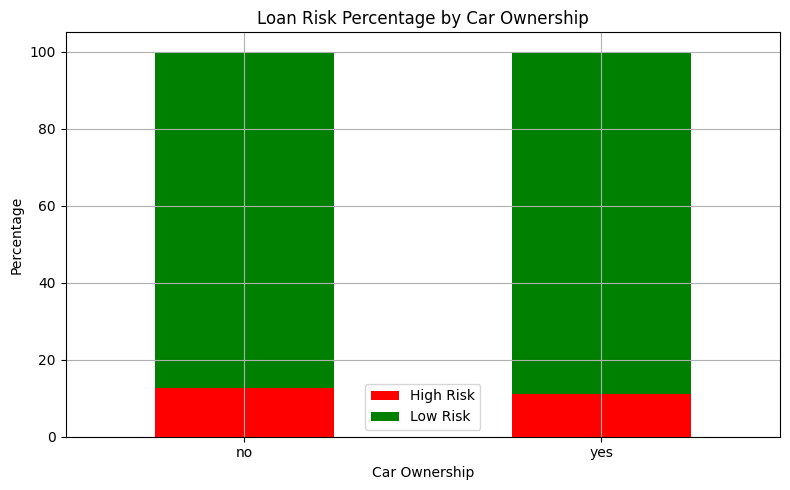

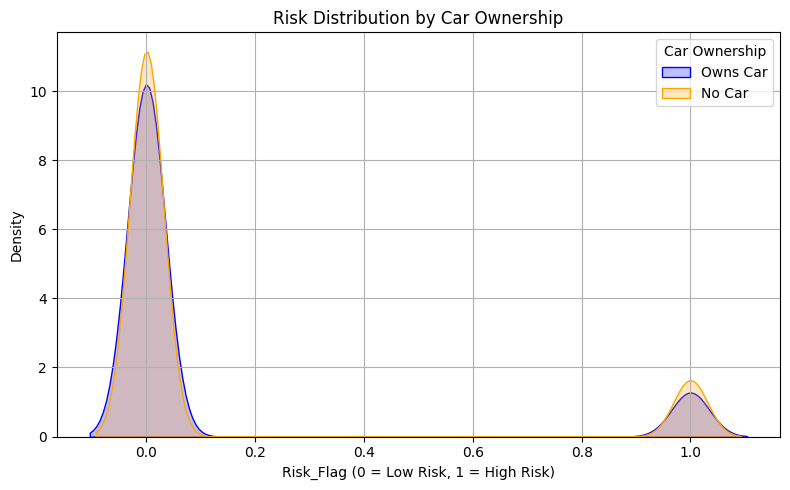

In [33]:
car_ownership()

### 🔍 Key Insights:

1. **Applicants who own a car are less likely to be high-risk borrowers.**  
   - High-Risk Rate: **11.13%** (car owners) vs **12.78%** (non-owners)
   - Suggests that **car ownership may correlate with greater financial stability** or better creditworthiness.

2. **Low-Risk rate is higher among car owners** by over **1.6 percentage points**.
   - This may indicate stronger asset backing or more consistent income patterns.

3. **Majority of applicants (70%) do not own a car**, yet they contribute **more to high-risk flags** in absolute numbers.
   - Possible explanation: non-owners may have lower income or weaker financial profiles.

---

### 🧭 Conclusion:

> **Car ownership appears to be a positive indicator for loan suitability.**  
> Lenders could consider it a secondary feature when assessing applicant risk, though not in isolation.

## Profession

📊 Profession vs Risk_Flag Percentage Table:
Risk_Flag                       0      1
Profession                              
Air_traffic_controller      86.58  13.42
Analyst                     87.58  12.42
Architect                   86.96  13.04
Army_officer                84.38  15.62
Artist                      87.79  12.21
Aviator                     86.14  13.86
Biomedical_Engineer         86.97  13.03
Chartered_Accountant        84.82  15.18
Chef                        87.89  12.11
Chemical_engineer           88.86  11.14
Civil_engineer              86.59  13.41
Civil_servant               88.43  11.57
Comedian                    87.90  12.10
Computer_hardware_engineer  87.09  12.91
Computer_operator           87.88  12.12
Consultant                  87.57  12.43
Dentist                     89.26  10.74
Design_Engineer             89.18  10.82
Designer                    89.37  10.63
Drafter                     88.85  11.15
Economist                   89.77  10.23
Engineer     

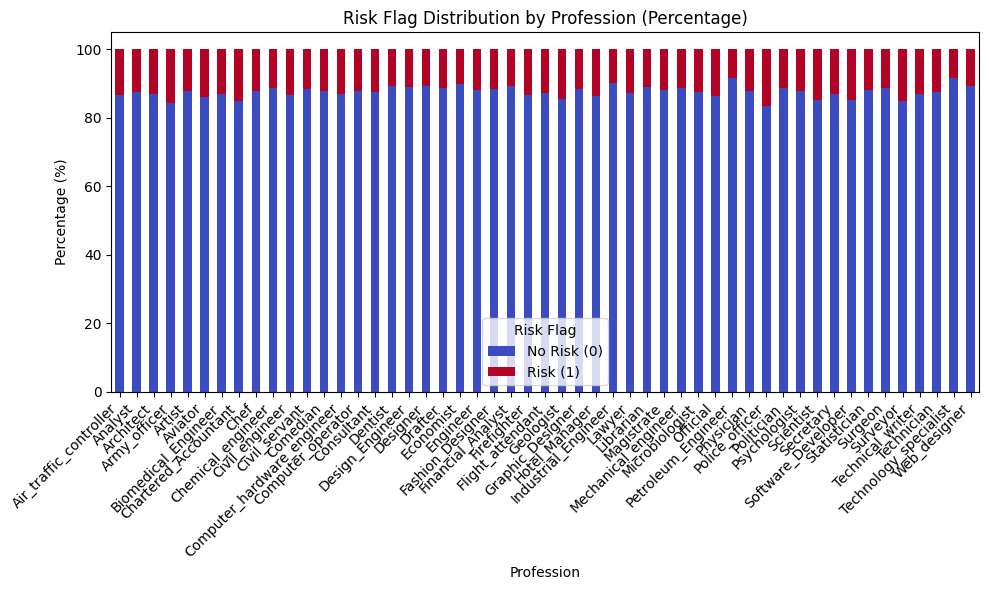

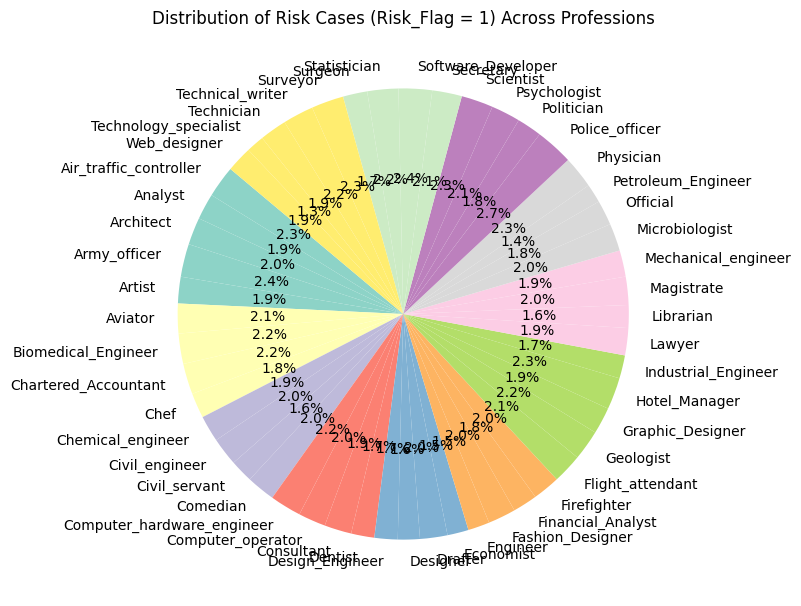

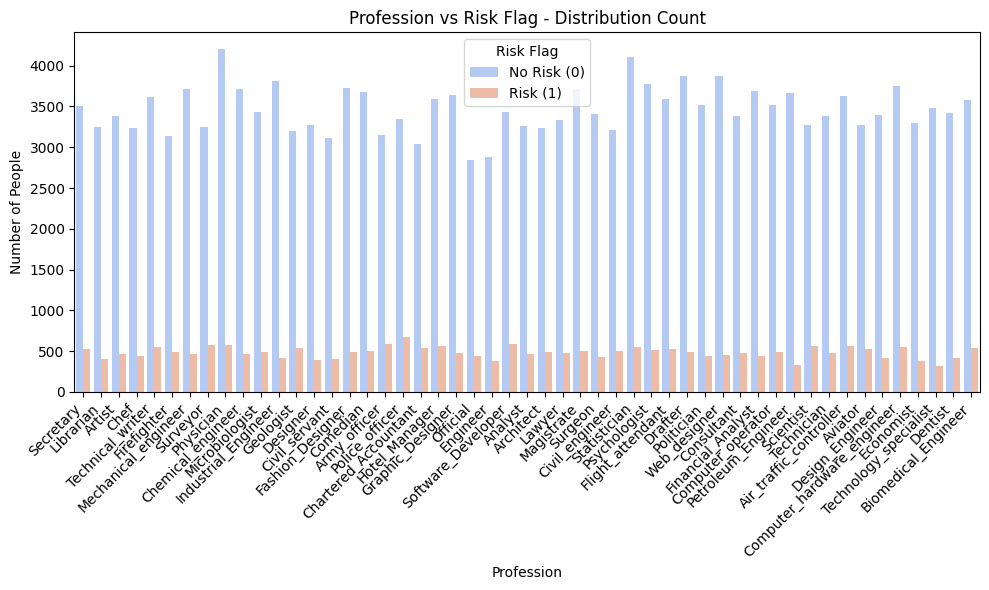

Risk_Flag,0,1
Profession,,
Air_traffic_controller,86.58,13.42
Analyst,87.58,12.42
Architect,86.96,13.04
Army_officer,84.38,15.62
Artist,87.79,12.21
Aviator,86.14,13.86
Biomedical_Engineer,86.97,13.03
Chartered_Accountant,84.82,15.18
Chef,87.89,12.11


In [34]:
profession_vs_risk_flag(train_df)

### 🔍 **Inference: Profession vs Risk_Flag**

#### ✅ **Low Risk (High % of Risk_Flag = 0) Professions:**
Professions with **more than 90% applicants not flagged as risky**:
- **Petroleum_Engineer**: 91.63% non-risk
- **Technology_specialist**: 91.63% non-risk
- **Industrial_Engineer**: 90.28% non-risk  

🟢 These fields might reflect **high stability or financial security**, making them more favorable for loan approvals.

---

#### ⚠️ **Higher Risk (High % of Risk_Flag = 1) Professions:**
Professions with **risk rates above 14%**:
- **Police_officer**: 16.65% at risk (highest risk)
- **Army_officer**: 15.62%
- **Chartered_Accountant**: 15.18%
- **Geologist**: 14.39%
- **Software_Developer**: 14.73%
- **Surveyor**: 14.99%
- **Scientist**: 14.72%

🔴 These may indicate **unstable income, field volatility**, or **stringent background checks** in financial risk models.

---

#### 🧠 **Balanced Risk Professions (around 12-13%)**:
Most professions such as:
- **Artist** (12.21%),  
- **Chef** (12.11%),  
- **Consultant** (12.43%),  
- **Psychologist** (12.05%)  
fall into this average zone.

🟡 These professionals likely present moderate risk, showing **standard creditworthiness**.

---

#### 💡 **General Insight:**
- The **majority of professions** show over **85% non-risk** distribution, which may reflect **responsible financial behavior** or **favorable socio-economic profiles**.
- However, some traditional or public service roles (like Police or Army) seem to have **slightly higher risk rates**, possibly due to irregular income patterns or other demographic influences.

## STATE

📊 STATE vs Risk_Flag Percentage Table:
Risk_Flag              0      1
STATE                          
Andhra_Pradesh     88.24  11.76
Assam              86.98  13.02
Bihar              87.04  12.96
Chandigarh         91.46   8.54
Chhattisgarh       86.93  13.07
Delhi              89.36  10.64
Gujarat            88.27  11.73
Haryana            87.78  12.22
Himachal_Pradesh   86.80  13.20
Jammu_and_Kashmir  84.22  15.78
Jharkhand          87.03  12.97
Karnataka          89.89  10.11
Kerala             83.72  16.28
Madhya_Pradesh     84.65  15.35
Maharashtra        88.69  11.31
Manipur            79.17  20.83
Mizoram            88.18  11.82
Odisha             85.33  14.67
Puducherry         88.24  11.76
Punjab             91.11   8.89
Rajasthan          85.78  14.22
Sikkim             95.81   4.19
Tamil_Nadu         89.85  10.15
Telangana          86.76  13.24
Tripura            84.13  15.87
Uttar_Pradesh      88.23  11.77
Uttar_Pradesh[5]   86.13  13.87
Uttarakhand        92.90   7.10
W

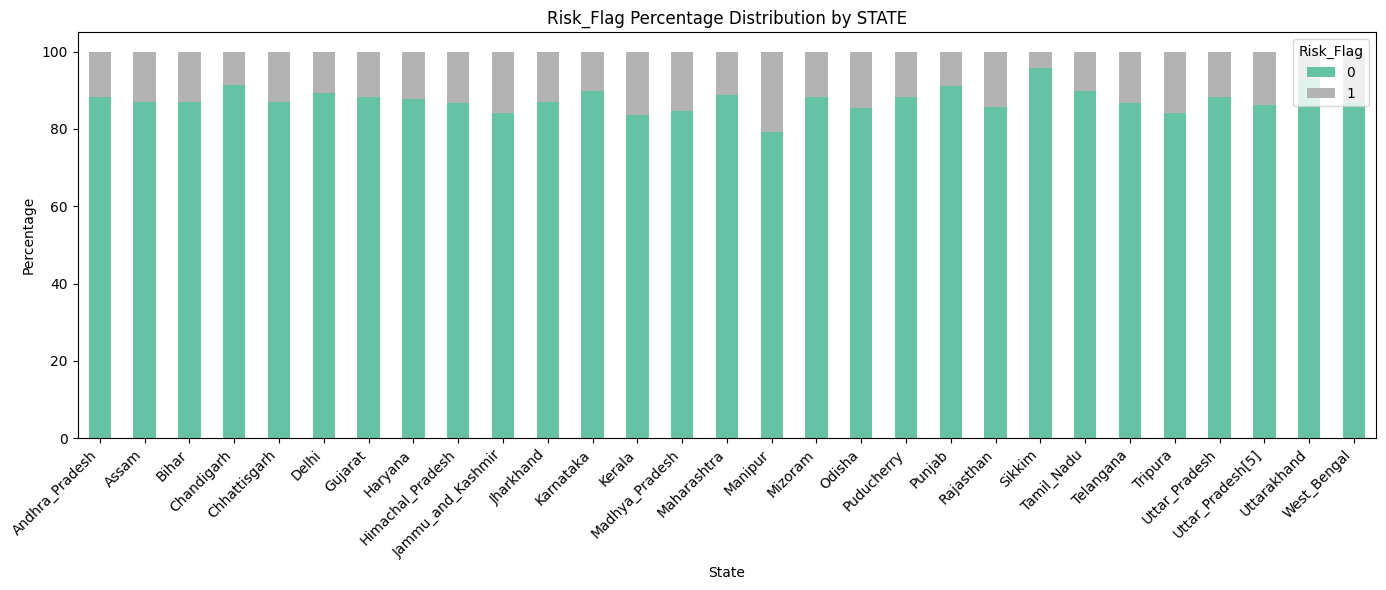

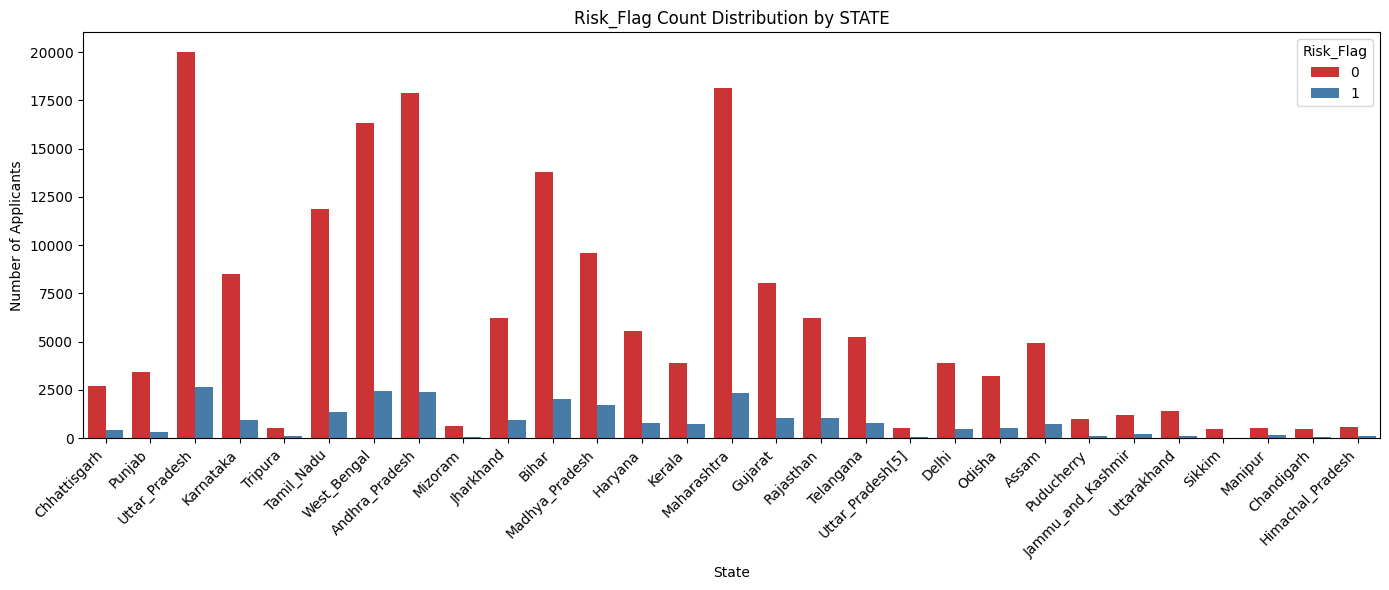

In [35]:
state_vs_risk_flag(train_df)

### 📌 **Key Inferences from STATE vs Risk_Flag:**

| Category                      | Description                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| 🔼 **Low Risk States**       | Sikkim (95.81%), Uttarakhand (92.90%), Chandigarh (91.46%), Punjab (91.11%) |
| ⚖️ **Mid Risk States**       | Delhi (89.36%), Karnataka (89.89%), Tamil Nadu (89.85%), Gujarat (88.27%)   |
| 🔽 **Higher Risk States**    | Kerala (16.28%), Manipur (20.83%), Tripura (15.87%), J&K (15.78%)           |

- **Sikkim** leads with the **lowest risk flag (1)** percentage at only **4.19%**.
- **Manipur** has the **highest proportion of risky applicants**, with **20.83%** flagged as high risk.
- States like **Kerala, Tripura, and Madhya Pradesh** also reflect a notably higher-than-average risk.

## CURRENT JOB YEARS

📊 CURRENT_JOB_YRS vs Risk_Flag Percentage Table:
Risk_Flag            0      1
CURRENT_JOB_YRS              
0                85.77  14.23
1                84.53  15.47
2                83.16  16.84
3                88.45  11.55
4                88.67  11.33
5                88.24  11.76
6                87.70  12.30
7                88.22  11.78
8                88.35  11.65
9                89.15  10.85
10               88.02  11.98
11               86.89  13.11
12               89.49  10.51
13               86.27  13.73
14               88.07  11.93


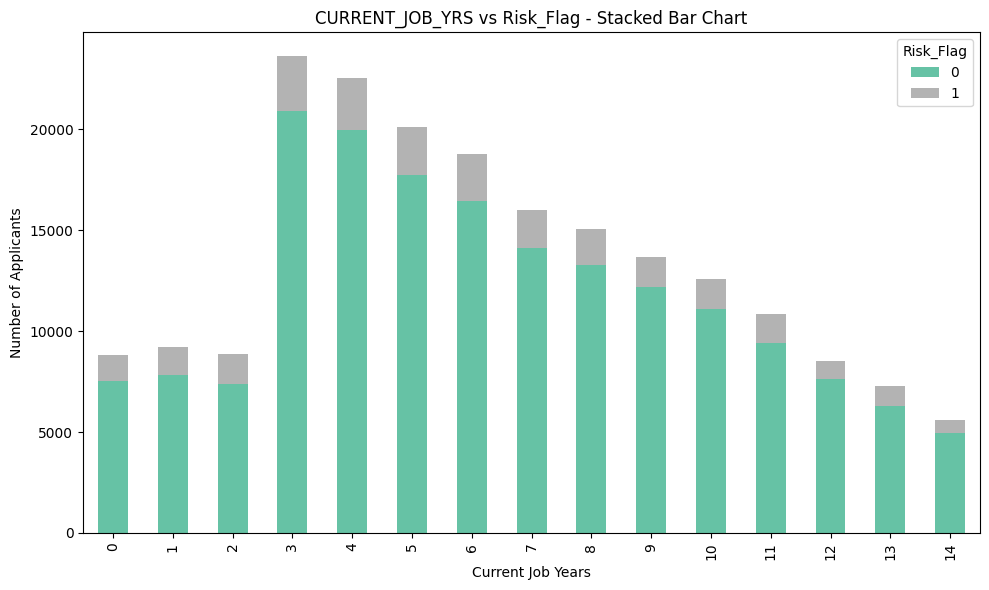

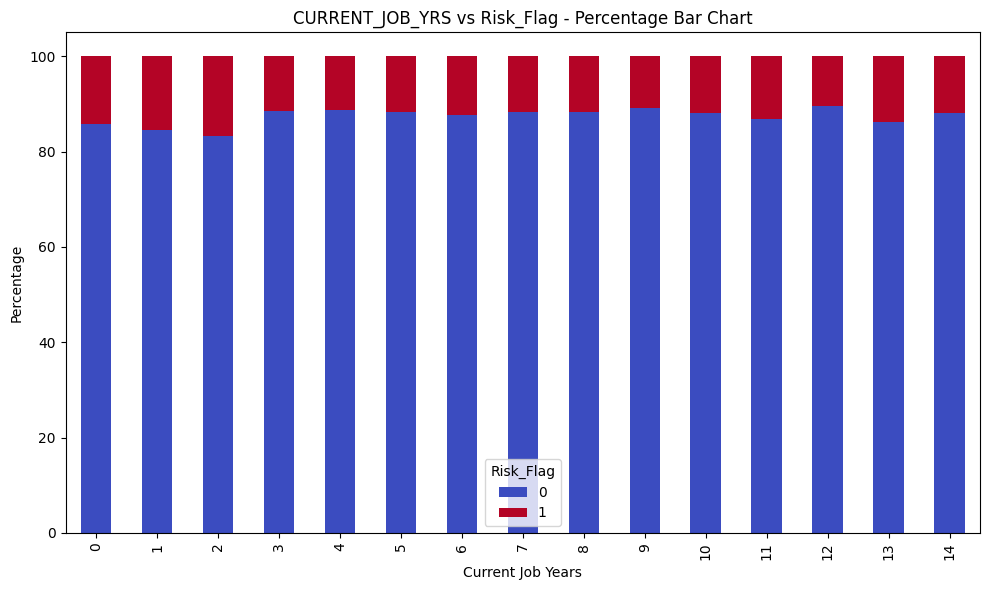

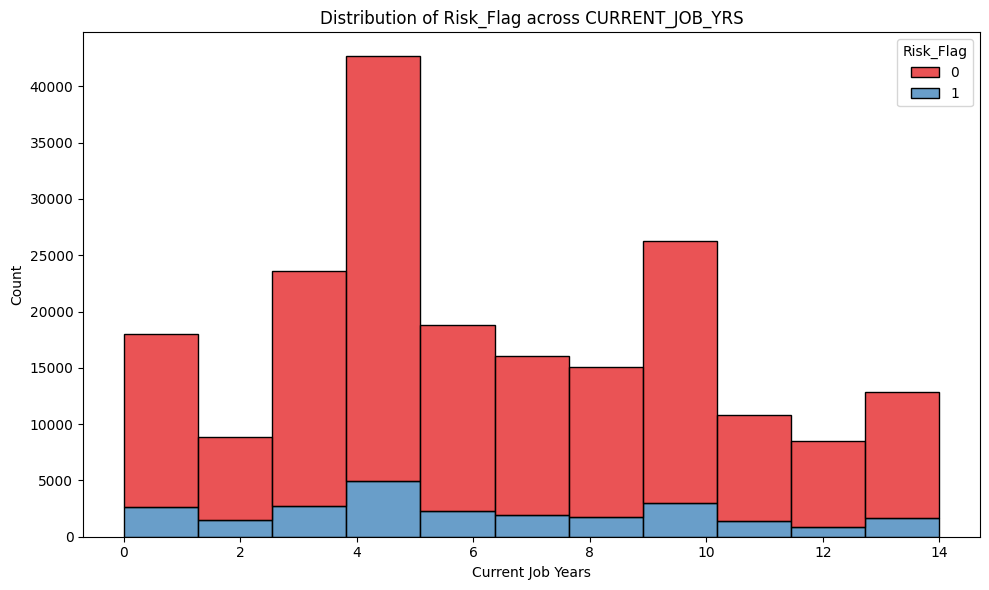

In [36]:
analyze_job_years_vs_risk(train_df)

### 📈 Inference: CURRENT_JOB_YRS vs Risk_Flag

Here's what we can interpret from the percentage distribution:

---

#### 🔹 **Higher Risk (Risk_Flag = 1) Among Newer Employees**
- The **first 3 years** of employment show **higher risk levels**:
  - **0 years**: 14.23% risky
  - **1 year**: 15.47% risky
  - **2 years**: 16.84% risky (the highest)
- This suggests that **less job experience correlates with higher default risk**.

---

#### 🔹 **Lower Risk With More Experience**
- Starting from **year 3 and above**, the risk levels drop below 12%:
  - **3–10 years**: Risk ranges from **10.85% to 12.30%**
  - **Best risk score**: Year **12** (only **10.51% risky**)

---

#### 🔹 **Slight Fluctuations in Later Years**
- Years **11 to 14** show **mild increases** in risk again (13–13.73%), possibly due to:
  - Career changes
  - Pre-retirement transitions
  - Small sample size in those years

## CURRENT_HOUSE_YRS

📊 CURRENT_HOUSE_YRS vs Risk_Flag Percentage Table:
Risk_Flag              0      1
CURRENT_HOUSE_YRS              
10                 87.63  12.37
11                 87.55  12.45
12                 87.78  12.22
13                 87.72  12.28
14                 87.93  12.07


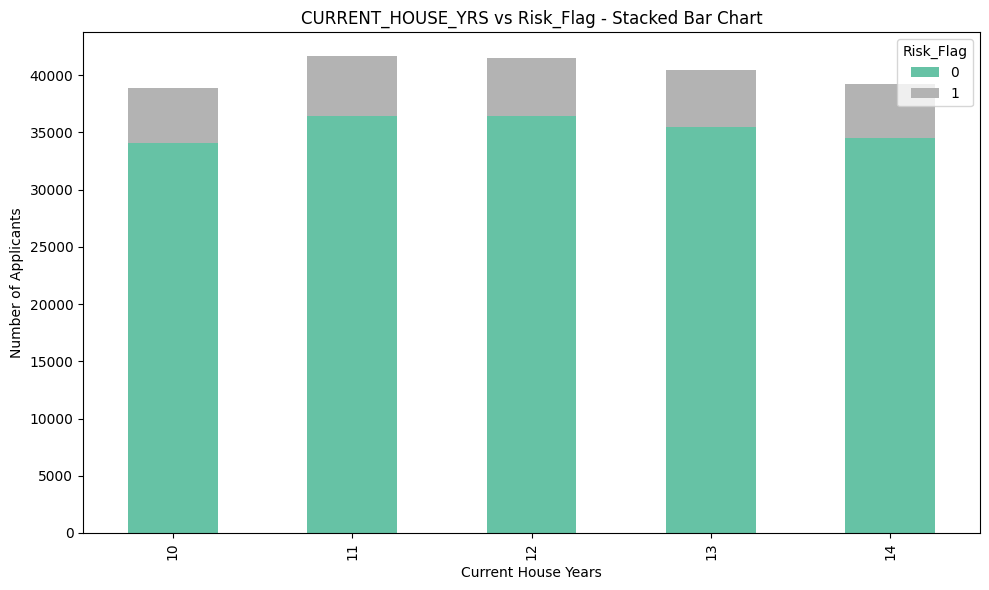

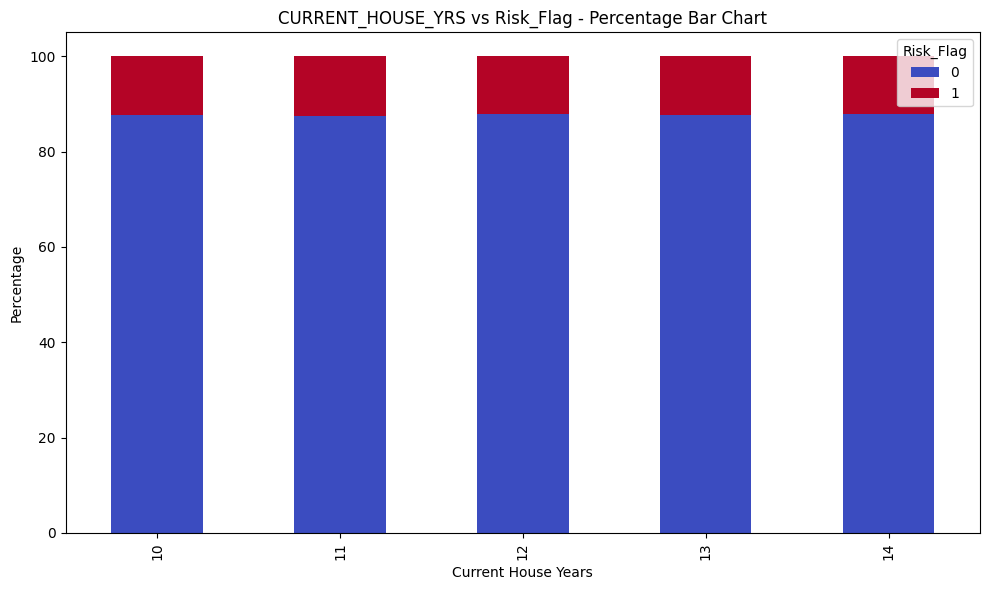

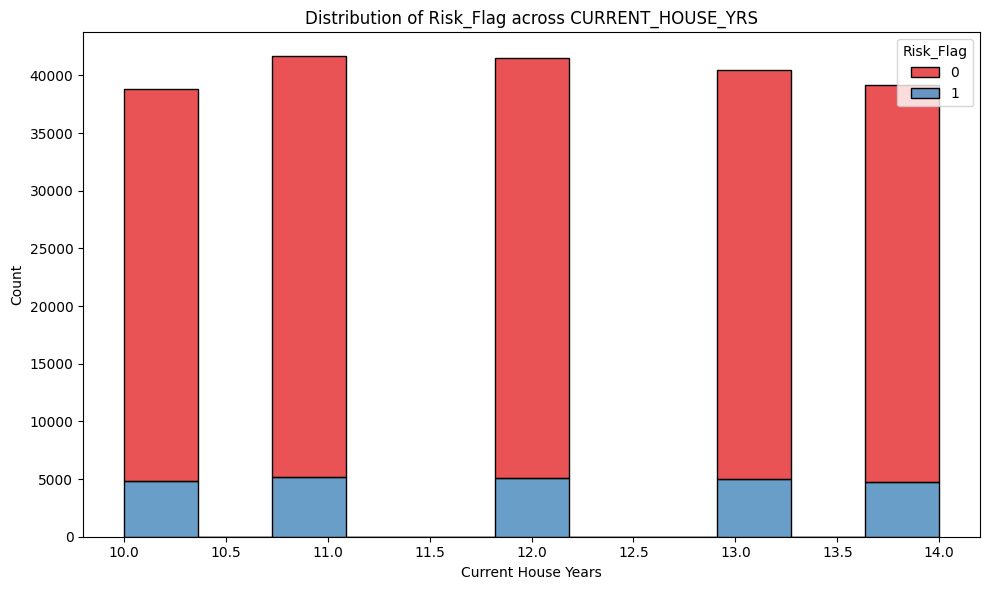

In [37]:
analyze_house_years_vs_risk(train_df)

### 📊 **CURRENT_HOUSE_YRS vs Risk_Flag Percentage Table:**
```
Risk_Flag              0      1
CURRENT_HOUSE_YRS               
10                 87.63  12.37
11                 87.55  12.45
12                 87.78  12.22
13                 87.72  12.28
14                 87.93  12.07
```

### Inference:

1. **Overall Risk_Flag Distribution:**
   - For every year of house tenure (`CURRENT_HOUSE_YRS`), the percentage of applicants with a `Risk_Flag` of `1` is consistently around **12%**.
   - The remaining **87%** of applicants have a `Risk_Flag` of `0`.

2. **Stability Across Years:**
   - The percentages for `Risk_Flag` = `0` (not risky) and `Risk_Flag` = `1` (risky) are quite stable across the different years of house ownership.
   - The differences in percentages between consecutive years (`CURRENT_HOUSE_YRS` 10–14) are minimal (ranging between 0.12% and 0.22%), indicating no strong fluctuation in risk based on the number of years someone has owned a house.

3. **Slightly Higher Risk for Longer House Tenure:**
   - There is a very slight trend of **decreasing risk** over time for individuals with longer house ownership (`CURRENT_HOUSE_YRS`). The percentage of applicants with `Risk_Flag` = `1` decreases from 12.37% at `CURRENT_HOUSE_YRS` = 10 to 12.07% at `CURRENT_HOUSE_YRS` = 14.
   - This suggests that individuals with a longer duration of house ownership may be marginally less likely to be flagged as risky.

4. **Risk Stability:**
   - The proportion of risky applicants (Risk_Flag = 1) remains relatively consistent across these years of house ownership, which suggests that `CURRENT_HOUSE_YRS` may not be a significant factor in determining risk, or other factors might be influencing risk more strongly.

### Conclusion:
- **Risk is fairly constant** across different house ownership durations, with a very small trend toward lower risk as house ownership years increase.

# Feature Engineering

In [113]:
train_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Range,Age_Group,Experience_Group
0,172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0,900k+,46-50,NaN
1,246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1,900k+,31-35,15-20 years
2,51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0,900k+,26-30,5-10 years
3,143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1,900k+,41-45,5-10 years
4,146824,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0,900k+,41-45,15-20 years


In [114]:
# train_df_new = train_df.drop(["Id", 'Income_Range', 'Age_Group', 'Experience_Group'], axis=1)
train_df_new = train_df.drop(["Id", "Experience_Group"], axis =1)
train_df_new.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Range,Age_Group
0,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0,900k+,46-50
1,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1,900k+,31-35
2,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0,900k+,26-30
3,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1,900k+,41-45
4,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0,900k+,41-45


In [115]:
train_df_new.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


### Data Cleaning

In [116]:


def convert_range_to_midpoint(series, unit_symbol='k', multiplier=1000, plus_buffer=50000):
    """
    Converts a series of ranges (like '100k-200k' or '900k+') to midpoints.

    Parameters:
        series (pd.Series): The column to convert.
        unit_symbol (str): Symbol used in the data ('k', 'M', etc.).
        multiplier (int): Multiplier to scale numbers (1000 for 'k', 1_000_000 for 'M').
        plus_buffer (int): Value to add for '+' entries (e.g. 50000 for '900k+').

    Returns:
        pd.Series: A series with midpoint numeric values.
    """
    def parse_range(value):
        if pd.isna(value):
            return np.nan

        value = value.lower().replace(',', '').strip()
        symbol = re.escape(unit_symbol.lower())

        # Range pattern: '100k-200k'
        match_range = re.match(fr'(\d+){symbol}-(\d+){symbol}', value)
        if match_range:
            low = int(match_range.group(1)) * multiplier
            high = int(match_range.group(2)) * multiplier
            return (low + high) / 2

        # Plus pattern: '900k+'
        match_plus = re.match(fr'(\d+){symbol}\+', value)
        if match_plus:
            low = int(match_plus.group(1)) * multiplier
            return low + plus_buffer

        return np.nan

    return series.apply(parse_range)


In [117]:
# Handles '100k-200k' → 150000 and '900k+' → 950000
train_df_new['Income_Range'] = convert_range_to_midpoint(train_df_new['Income_Range'], unit_symbol='k', multiplier=1000, plus_buffer=50000)

In [118]:
def convert_age_group_to_midpoint(series, strategy='lower', open_ended_buffer=5):
    """
    Converts age group ranges like '31-35' or '76+' to numeric midpoints.

    Parameters:
        series (pd.Series): The column to transform.
        strategy (str): How to handle open-ended values like '76+':
                        - 'lower': return just the lower bound
                        - 'buffer': add open_ended_buffer and average
                        - 'nan': return np.nan
        open_ended_buffer (int): Used only if strategy is 'buffer'

    Returns:
        pd.Series: Numeric midpoint values.
    """
    def parse_age(value):
        if pd.isna(value):
            return np.nan

        value = str(value).strip()

        # Match standard range like '31-35'
        match_range = re.match(r'(\d+)-(\d+)', value)
        if match_range:
            low = int(match_range.group(1))
            high = int(match_range.group(2))
            return (low + high) / 2

        # Match open-ended like '76+'
        match_plus = re.match(r'(\d+)\+', value)
        if match_plus:
            low = int(match_plus.group(1))
            if strategy == 'lower':
                return low
            elif strategy == 'buffer':
                return (low + (low + open_ended_buffer)) / 2
            elif strategy == 'nan':
                return np.nan

        return np.nan

    return series.apply(parse_age)


train_df_new['Age_Group'] = convert_age_group_to_midpoint(train_df_new['Age_Group'])


In [119]:
train_df_new['Age_Group'] = train_df_new['Age_Group'].astype(float)


## Creating New Columns TO Boost Model

In [120]:
# Derived Features
train_df_new['Experience_Age_Ratio'] = train_df_new['Experience'] / train_df_new['Age_Group']
train_df_new['Job_Stability'] = train_df_new['CURRENT_JOB_YRS'] / (train_df_new['Experience'] + 1)
train_df_new['House_Stability'] = train_df_new['CURRENT_HOUSE_YRS'] / train_df_new['Age_Group']
train_df_new['Experienced'] = (train_df_new['Experience'] > 10).astype(int)

train_df_new['Income_to_Exp_Ratio'] = train_df_new['Income'] / (train_df_new['Experience'] + 1)

# Wealth Index - Weighted combination of income and asset ownership
train_df_new['Wealth_Index'] = (
    train_df_new['Income'] * train_df_new['House_Ownership'].map({'Rented': 0.5, 'Owned': 1, 'Norent_Noown': 0}) +
    train_df_new['Car_Ownership'].map({'Yes': 1, 'No': 0})
)

# Stability score of current house relative to adult life duration
train_df_new['House_Stability_Score'] = train_df_new['CURRENT_HOUSE_YRS'] / (train_df_new['Age'] - 18 + 1)

# Categorical Group-based Features
profession_stability = train_df_new.groupby('Profession')['CURRENT_JOB_YRS'].mean().to_dict()
train_df_new['Profession_Stability'] = train_df_new['Profession'].map(profession_stability)

city_income_avg = train_df_new.groupby('CITY')['Income'].mean().to_dict()
train_df_new['City_Cost_of_Living'] = train_df_new['CITY'].map(city_income_avg)

train_df_new['Marital_Home_Status'] = train_df_new['Married/Single'] + "_" + train_df_new['House_Ownership']

state_risk = train_df_new.groupby('STATE')['Risk_Flag'].mean().to_dict()
train_df_new['State_Risk_Profile'] = train_df_new['STATE'].map(state_risk)

# Interactions
train_df_new['Income_Age_Interaction'] = train_df_new['Income'] * train_df_new['Age']
train_df_new['Experience_Age_Ratio'] = train_df_new['Experience'] / (train_df_new['Age'] - 18 + 1)

# Time-Based Binning
bins = [0, 5, 15, 50]
labels = ['Early', 'Mid', 'Late']
train_df_new['Career_Stage'] = pd.cut(train_df_new['Experience'], bins=bins, labels=labels)

train_df_new['Years_Since_First_Job'] = train_df_new['Age'] - train_df_new['Experience']


In [121]:
# Step 1: Check for unexpected categories
print("Unique House_Ownership values:", train_df_new['House_Ownership'].unique())
print("Unique Car_Ownership values:", train_df_new['Car_Ownership'].unique())

# Step 2: Handle missing values (if any)
train_df_new.fillna({
    'Income': 0,  # Or use median: train_df_new['Income'].median()
    'House_Ownership': 'Norent_noown',  # Default category
    'Car_Ownership': 'No'               # Default category
}, inplace=True)

# Step 3: Standardize categories (fix typos)
train_df_new['House_Ownership'] = train_df_new['House_Ownership'].str.strip().str.title()
train_df_new['Car_Ownership'] = train_df_new['Car_Ownership'].str.strip().str.title()

# Step 4: Recalculate Wealth_Index (with error handling)
train_df_new['Wealth_Index'] = (
    train_df_new['Income'] * train_df_new['House_Ownership'].map({'Rented': 0.5, 'Owned': 1, 'Norent_noown': 0})
    + train_df_new['Car_Ownership'].map({'Yes': 1, 'No': 0})
)

# Verify no NaN remains
assert train_df_new['Wealth_Index'].isnull().sum() == 0, "NaN values still exist!"

Unique House_Ownership values: ['rented' 'owned' 'norent_noown']
Unique Car_Ownership values: ['no' 'yes']


AssertionError: NaN values still exist!

In [122]:
train_df_new.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


In [123]:
train_df_new.drop(["Wealth_Index", "Career_Stage"], axis = 1, inplace = True)

In [124]:
train_df_new.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,House_Stability,Experienced,Income_to_Exp_Ratio,House_Stability_Score,Profession_Stability,City_Cost_of_Living,Marital_Home_Status,State_Risk_Profile,Income_Age_Interaction,Years_Since_First_Job
0,4588175,49,20,single,Rented,No,Secretary,Bilaspur,Chhattisgarh,6,...,0.229167,1,2.184845e+05,0.343750,6.546898,4.997362e+06,single_rented,0.130717,224820575,29
1,6510821,31,15,single,Rented,No,Librarian,Amritsar,Punjab,12,...,0.303030,1,4.069263e+05,0.714286,5.840186,4.802182e+06,single_rented,0.088895,201835451,16
2,9338129,26,7,single,Rented,No,Artist,Farrukhabad,Uttar_Pradesh,4,...,0.500000,0,1.167266e+06,1.555556,6.240021,4.801638e+06,single_rented,0.117660,242791354,19
3,8053436,42,8,single,Rented,No,Chef,Mysore[7][8][9],Karnataka,8,...,0.255814,0,8.948262e+05,0.440000,6.273344,5.763525e+06,single_rented,0.101077,338244312,34
4,3589662,42,18,single,Rented,Yes,Technical_writer,Bareilly,Uttar_Pradesh,13,...,0.302326,1,1.889296e+05,0.520000,6.257397,4.632000e+06,single_rented,0.117660,150765804,24


### Joining Eexperience and Current Job Years

In [125]:
def sum_and_drop_columns(df, cols_to_sum, new_col_name):
    """
    Sums specified numeric columns into a new float column, then drops the originals.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        cols_to_sum (list): List of column names to sum.
        new_col_name (str): Name of the new column to create.

    Returns:
        pd.DataFrame: Modified DataFrame with new column and dropped originals.
    """
    df = df.copy()
    df[new_col_name] = df[cols_to_sum].astype(float).sum(axis=1)
    df.drop(cols_to_sum, axis=1, inplace=True)
    return df

# Example usage on train_df_new
# train_df_new = sum_and_drop_columns(train_df_new, ['CURRENT_JOB_YRS', 'Experience'], 'Job_Experience')
# print(train_df_new.head())


### 🔍 1. **Understanding the Features**  
- `CURRENT_JOB_YRS`: How long someone has stayed in their current job.  
- `Experience`: Likely their **total work experience**.

⚠️ These two are **not totally independent**. In fact, staying longer in a current job usually contributes to the total experience, unless it's calculated differently (like excluding current job years). So they can **overlap**.

---

### 🎯 2. **Why Combine Them?**
#### ✅ To reduce **dimensionality**
- Fewer columns = simpler models.
- Especially helpful in linear models and regularization techniques like Lasso/Ridge.

#### ✅ To avoid **multicollinearity**
- Highly correlated features can **confuse the model**.
- In linear models, it makes coefficients unstable.

#### ✅ To capture a **richer signal**
- Combining might better reflect **total stability and experience**, which could impact the prediction (like risk flag).

#### ✅ To help small models generalize better
- Simpler feature space = less chance of overfitting when data is limited.

---

### 🙅‍♂️ Why NOT Combine Them?
#### ❌ You may lose **important differences**
- For example, a person with 15 years total experience but only 1 year in the current job is very different from someone who’s had 10 years in the same job.

#### ❌ Tree-based models don’t need it
- Models like Random Forest and XGBoost **automatically handle** feature interactions and redundancy well. They don’t mind correlated features as much.

---

### 💡 The Right Move?
**Test both.**  
- If you’re using a linear model → Try combining.  
- If you’re using tree-based models → Try both, but you may not gain much by combining.

## Splitting Data Into X and y

In [126]:
X = train_df_new.drop(["Risk_Flag"], axis=1)
y = train_df_new["Risk_Flag"]

In [127]:
print(X.shape)
print(y.shape)

(201600, 25)
(201600,)


In [128]:
print(X.head())
y.head()

    Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  4588175   49          20         single          Rented            No   
1  6510821   31          15         single          Rented            No   
2  9338129   26           7         single          Rented            No   
3  8053436   42           8         single          Rented            No   
4  3589662   42          18         single          Rented           Yes   

         Profession             CITY          STATE  CURRENT_JOB_YRS  ...  \
0         Secretary         Bilaspur   Chhattisgarh                6  ...   
1         Librarian         Amritsar         Punjab               12  ...   
2            Artist      Farrukhabad  Uttar_Pradesh                4  ...   
3              Chef  Mysore[7][8][9]      Karnataka                8  ...   
4  Technical_writer         Bareilly  Uttar_Pradesh               13  ...   

   House_Stability  Experienced  Income_to_Exp_Ratio  House_Stability_Score  \
0

,Risk_Flag
0,0
1,1
2,0
3,1
4,0


### Spliting Data into Train and Test Set

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# Print the shapes of train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (161280, 25)
X_test shape: (40320, 25)
y_train shape: (161280,)
y_test shape: (40320,)


In [131]:
# print(f" {X_train}")
# print(f"X_test  {X_test}")
# print(f"y_train  {y_train}")
# print(f"y_test  {y_test}")
X_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,House_Stability,Experienced,Income_to_Exp_Ratio,House_Stability_Score,Profession_Stability,City_Cost_of_Living,Marital_Home_Status,State_Risk_Profile,Income_Age_Interaction,Years_Since_First_Job
57654,6670038,37,13,single,Rented,No,Artist,Amaravati,Andhra_Pradesh,5,...,0.368421,1,4.764313e+05,0.700000,6.240021,5.480007e+06,single_rented,0.117569,246791406,24
115853,2572120,22,0,single,Rented,No,Civil_engineer,Ahmednagar,Maharashtra,0,...,0.478261,0,2.572120e+06,2.200000,6.642607,4.962116e+06,single_rented,0.113118,56586640,22
130470,4341353,78,6,single,Norent_Noown,Yes,Petroleum_Engineer,Yamunanagar,Haryana,6,...,0.131579,0,6.201933e+05,0.163934,6.441169,5.343853e+06,single_norent_noown,0.122163,338625534,72
39155,3177468,42,17,married,Rented,Yes,Computer_hardware_engineer,Eluru[25],Andhra_Pradesh,5,...,0.325581,1,1.765260e+05,0.560000,6.204134,5.144078e+06,married_rented,0.117569,133453656,25
175732,7710970,39,13,single,Rented,No,Librarian,Bardhaman,West_Bengal,11,...,0.368421,1,5.507836e+05,0.636364,5.840186,5.305773e+06,single_rented,0.128991,300727830,26


### Encoding Categorical Features

In [132]:
X_train, X_test =  encode_category_data(X_train, X_test)

In [133]:
X_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,House_Stability,Experienced,Income_to_Exp_Ratio,House_Stability_Score,Profession_Stability,City_Cost_of_Living,Marital_Home_Status,State_Risk_Profile,Income_Age_Interaction,Years_Since_First_Job
57654,6670038,37,13,1,2.0,0,4.0,12.0,0.0,5,...,0.368421,1,4.764313e+05,0.700000,6.240021,5.480007e+06,5.0,0.117569,246791406,24
115853,2572120,22,0,1,2.0,0,10.0,4.0,14.0,0,...,0.478261,0,2.572120e+06,2.200000,6.642607,4.962116e+06,5.0,0.113118,56586640,22
130470,4341353,78,6,1,0.0,1,36.0,316.0,7.0,6,...,0.131579,0,6.201933e+05,0.163934,6.441169,5.343853e+06,3.0,0.122163,338625534,72
39155,3177468,42,17,0,2.0,1,13.0,90.0,0.0,5,...,0.325581,1,1.765260e+05,0.560000,6.204134,5.144078e+06,2.0,0.117569,133453656,25
175732,7710970,39,13,1,2.0,0,31.0,33.0,28.0,11,...,0.368421,1,5.507836e+05,0.636364,5.840186,5.305773e+06,5.0,0.128991,300727830,26


# Using Stander Scaler on Train and Test Set

In [134]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on train set, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [135]:
print(X_test_scaled.shape)
X_train_scaled.shape

(40320, 25)


(161280, 25)

In [136]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Accuracy:", round(acc, 4))
print("🧮 Confusion Matrix:\n", conf_matrix)
print("🎯 F1 Score:", round(f1, 4))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:11:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 0.8934
🧮 Confusion Matrix:
 [[34669   797]
 [ 3503  1351]]
🎯 F1 Score: 0.3859


In [137]:
# Install scikit-learn (if not already installed)
!pip install scikit-learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler  # Crucial for KNN!

# 1. Standardize the data (KNN is distance-based, so scaling is mandatory!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=20)  # Start with k=5 (adjust based on tuning)
knn.fit(X_train_scaled, y_train)

# 3. Predict
y_pred = knn.predict(X_test_scaled)

# 4. Evaluation
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Accuracy:", round(acc, 4))
print("🧮 Confusion Matrix:\n", conf_matrix)
print("🎯 F1 Score:", round(f1, 4))

✅ Accuracy: 0.8938
🧮 Confusion Matrix:
 [[33641  1825]
 [ 2459  2395]]
🎯 F1 Score: 0.5279


In [138]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Best-performing setup (SMOTE + smaller k)
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42),
    KNeighborsClassifier(n_neighbors=5)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     35466
           1       0.43      0.57      0.49      4854

    accuracy                           0.86     40320
   macro avg       0.69      0.73      0.71     40320
weighted avg       0.88      0.86      0.87     40320



In [144]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


### RandomOverSampler

### RandomUnderSampler

In [145]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Initialize XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train on balanced data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predict on original test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print results
print(f"✅ Accuracy: {accuracy_xgb:.4f}")
print("🧮 Confusion Matrix:\n", conf_matrix_xgb)
print(f"🎯 F1 Score: {f1_xgb:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:15:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 0.8830
🧮 Confusion Matrix:
 [[31825  3641]
 [ 1077  3777]]
🎯 F1 Score: 0.6155
